In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
import datetime
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
pd.set_option('display.max_columns', None)

In [2]:
# Cargamos los datos
file = "Informacion Puerto Angamos-Revisado-Fechas 2020-2022.xlsx"
df = pd.read_excel(file)
df.shape

(7233, 39)

In [3]:
#  & df["Hora Legada a Espera"].notna()
df_ss = df[df["Producto"].notna() & df["Hora Ingreso a Puerto"].notna()]
df_ss.shape

(6487, 39)

In [4]:
df_ss.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Fecha Guía,Hora Guía,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Astudillo,LLBC42,GPS,2686451,20200115 17:24:00,NPC-R SOLAR,Coya Sur-Puerto Angamos,Coya Sur,20200114 21:47:18,20200114 21:47:18,Puerto Angamos,20200116 12:24:49,20200115 20:49:19,884.35,20200116 11:33:40,51.15,0.0,NaN,Parqueo,20200115.0,17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ss.columns

Index(['Flota', 'Patente', 'Tipo', 'N Guia', 'Fecha', 'Producto', 'Viaje',
       'Origen', 'Origen inicio', 'Origen salida', 'Destino',
       'Destino termino', 'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto',
       'Tiempo total Descarga', 'Nombre Cancha', 'Nombre Geo Espera Exterior',
       'Fecha Guía', 'Hora Guía', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

In [6]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'QROP-KS', 'ULTRASOL NKS',
       'SSR-C | SSR-C | SSR-C', 'LSI (S)', 'LSI (S) | LSI (S)'],
      dtype=object)

In [7]:
cols = ["Producto",'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto']

In [8]:
df_ss = df_ss[cols]

In [9]:
df_ss = df_ss[(df_ss["Producto"].str.contains("SSR")) | (df_ss["Producto"].str.contains("NPC"))]

In [10]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'SSR-C | SSR-C | SSR-C'], dtype=object)

In [11]:
df_ss[df_ss["Hora Legada a Espera"].notna()].shape[0], df_ss.shape[0]

(5679, 5684)

### 1 - Distribucion Tiempos de Descarga

In [12]:
pdf = []
rangos = [0, 15, 30, 45, 60, 75, 90, 120, 180, 240, 300, 360]
for i in range(1,len(rangos)):
    pdf.append(df_ss[(df_ss["Tiempo Total en Puerto"] > rangos[i-1]) & (df_ss["Tiempo Total en Puerto"] <= rangos[i])].shape[0])
    
pdf = np.array(pdf)
pdf

array([  22,  645,  949, 1012,  783,  570,  726,  625,  146,   50,   21])

In [13]:
tot = pdf.sum()
perc = 100*np.array(pdf)/tot
tot

5549

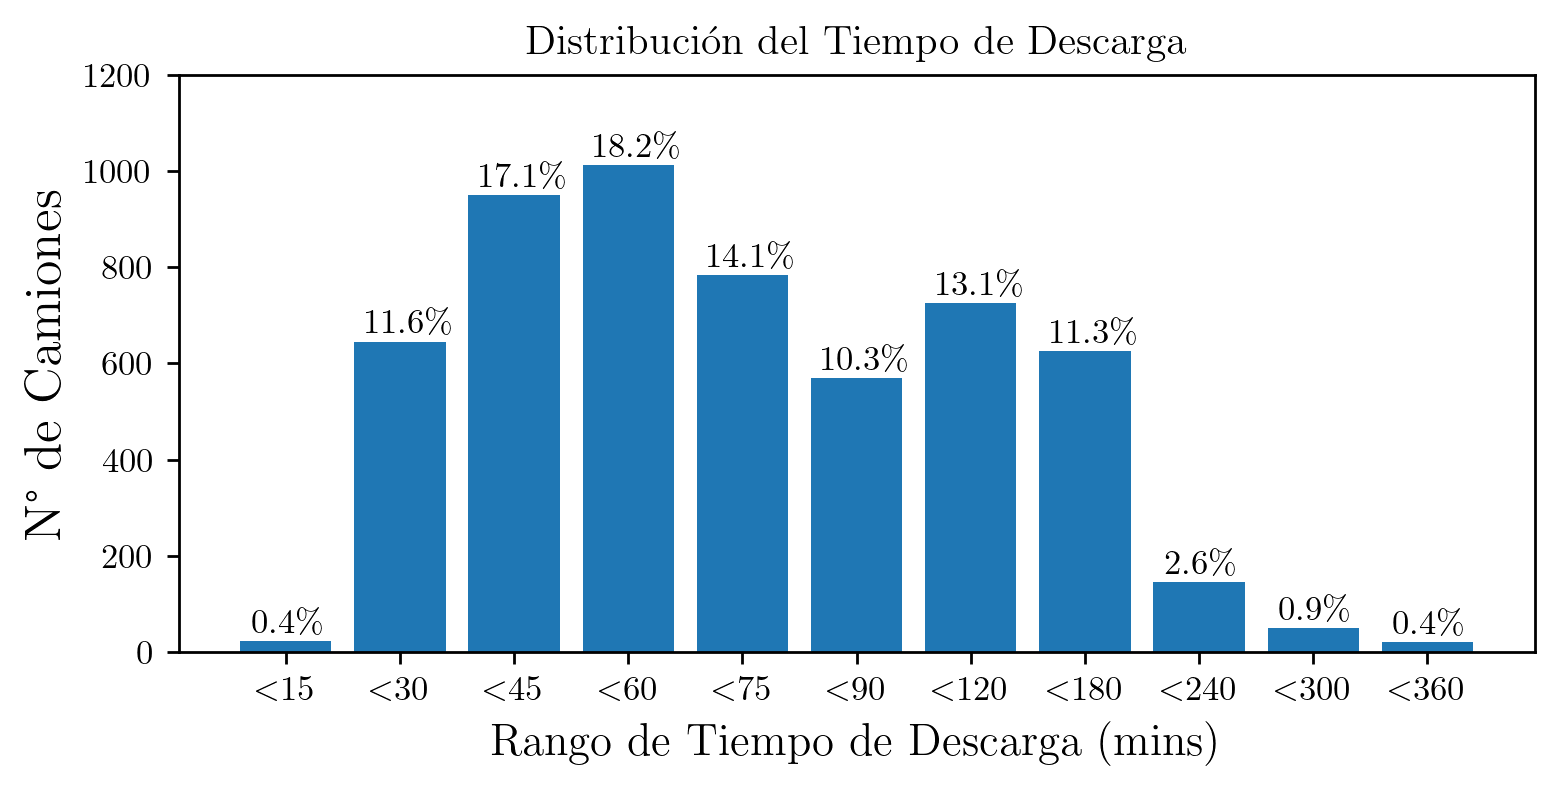

In [14]:
bins = np.array([r"$<$"+str(i) for i in rangos[1:]])
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Distribución del Tiempo de Descarga")
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango de Tiempo de Descarga (mins)", fontsize = 13)
ax1.bar(bins, pdf, label = "Viajes")
ax1.set_ylim([0,1200])


for i, label in enumerate(perc):
    plt.annotate(str(round(label,1))+"\%", (i-0.3, pdf[i]+17.))

plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")   

### 2 - Camiones por Turno

In [15]:
#df_ss.reset_index(drop = True, inplace = True)

In [16]:
df_ss["Hora Ingreso a Puerto"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"])

In [17]:
t1 = datetime.time(0,0,0)
t2 = datetime.time(8,30,0)
t3 = datetime.time(10,0,0)
t4 = datetime.time(12,0,0)
t5 = datetime.time(14,0,0)
t6 = datetime.time(15,30,0)
t7 = datetime.time(17,0,0)
t8 = datetime.time(19,0,0)
t9 = datetime.time(21,0,0)
t10 = datetime.time(22,30,0)
t11 = datetime.time(23,59,59)


T = np.array([t2, t3, t4, t5, t6, t7, t8, t9, t10, t11])


turnos = np.array(["Pre", "T1A", "T1B", "T1C", "Almuerzo",
          "T2A", "T2B", "T2C", "T2D", "Post"])

In [18]:
def Turno(t):
    for idx, val in enumerate(T):
        if t.time() < val:
            return turnos[idx]

In [19]:
df_ss["Turno en Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Turno(x))

In [20]:
df_ss.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B


In [21]:
N_turnos = np.array([df_ss[df_ss["Turno en Puerto"] == i].shape[0] for i in turnos])
N_turnos

array([ 146,  828, 1143,  696,  475,  656,  810,  746,  181,    3])

In [22]:
T_turnos = np.array([df_ss["Tiempo Total en Puerto"][df_ss["Turno en Puerto"] == i].mean() for i in turnos])
T_turnos

array([ 78.18778539,  73.7328905 ,  87.85958005,  97.72624521,
       119.14950877,  78.46643801,  82.74024691, 118.85417784,
       160.69069982,  22.16111111])

In [23]:
T_ponderado = (N_turnos*T_turnos).sum()/N_turnos.sum()
T_ponderado

93.91511846117862

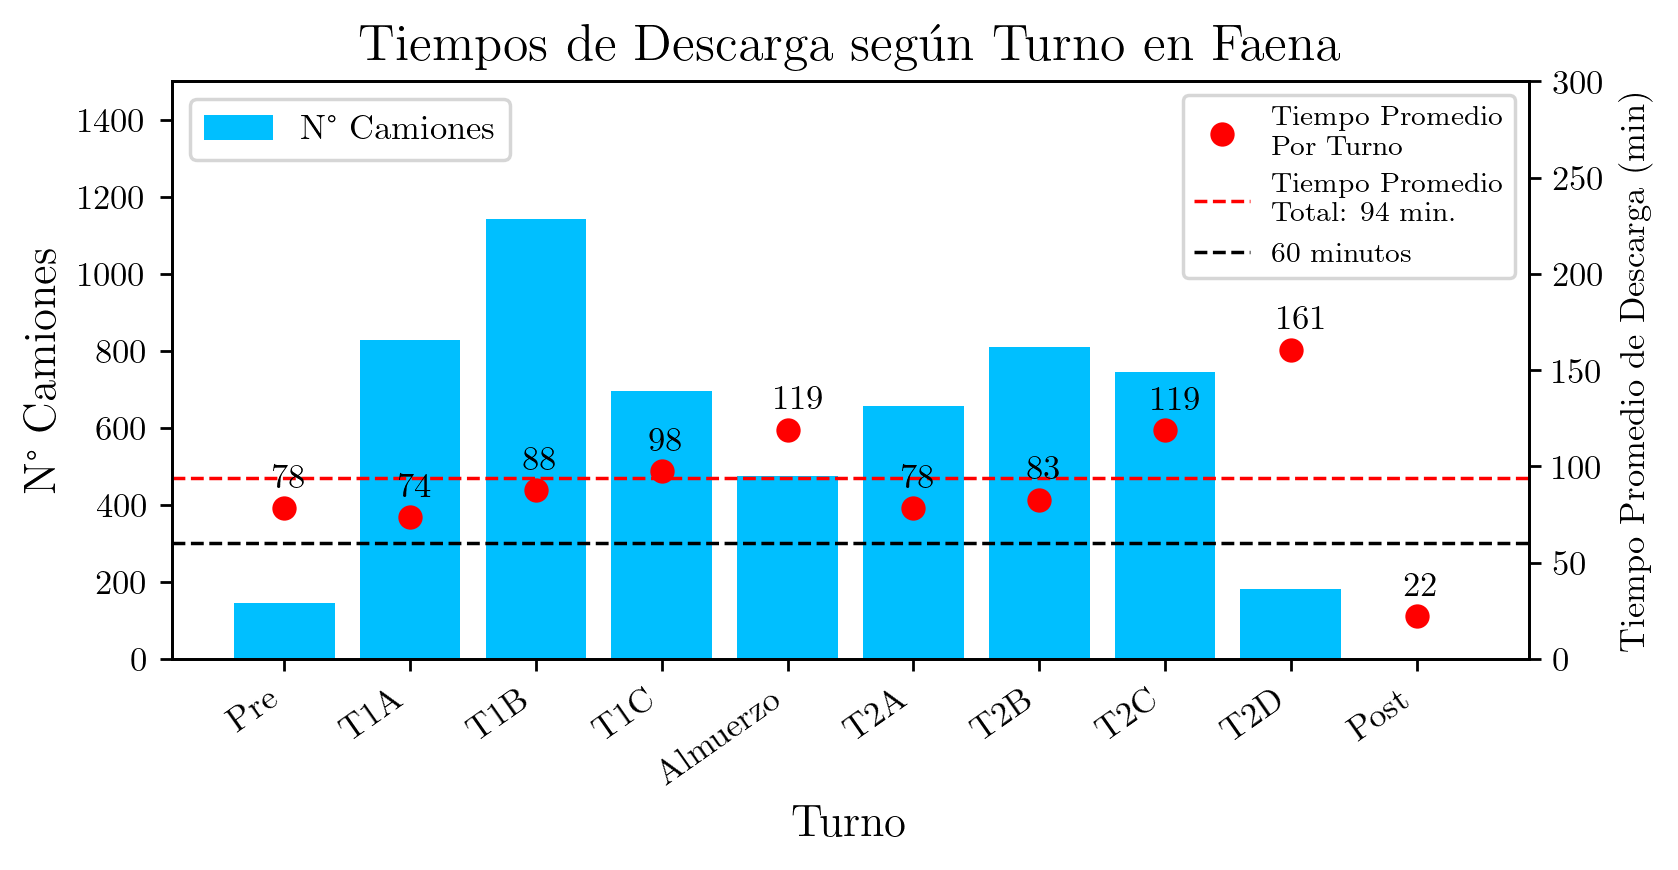

In [24]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.bar(turnos, N_turnos, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,1500])
ax1.set_ylabel("N° Camiones", fontsize = 13)
ax1.set_xlabel("Turno", fontsize = 13)
ax1.legend(loc = "upper left")
ax1.set_xticks(turnos)
ax1.set_xticklabels(turnos, rotation = 35, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


ax2 = ax1.twinx() 

ax2.plot(turnos, T_turnos, "ro", label = "Tiempo Promedio \n Por Turno")
ax2.set_title("Tiempos de Descarga según Turno en Faena", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_ponderado, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_ponderado)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([0,300])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_turnos):
    plt.annotate(str(round(label)), (i-0.1, T_turnos[i]+10.7))


plt.savefig("Graficos/Tiempos de Descarga por Turno.png", bbox_inches= "tight")

In [321]:
N_turnos2 = np.array([df_ss[df_ss["Turno en Puerto"] == i].shape[0] for i in turnos])
N_turnos2

array([ 146,  828, 1143,  696,  475,  656,  810,  746,  181,    3])

In [115]:
df_ss.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False


### 3 - Tiempos de Descarga por Mes

In [25]:
meses = ["Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre",
        "Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre"]

In [26]:
def Mes(date):
    idx = date.month - 1
    return meses[idx]

In [27]:
df_ss["Mes de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Mes(x))

In [28]:
df_ss["Año de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: x.year)

In [29]:
df_ss.head(2)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020


In [30]:
años = df_ss["Año de Descarga"].unique()

In [31]:
N_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss[(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].shape[0]
        N_mes.append(a)

N_mes = np.array(N_mes)
N_mes

array([353, 721, 258, 893, 586, 572,   0,   0, 358, 559, 240,   0,   0,
         0,   0,   0,   0,   0,   0, 157, 409, 578,   0,   0])

In [32]:
len(N_mes), len(meses)

(24, 24)

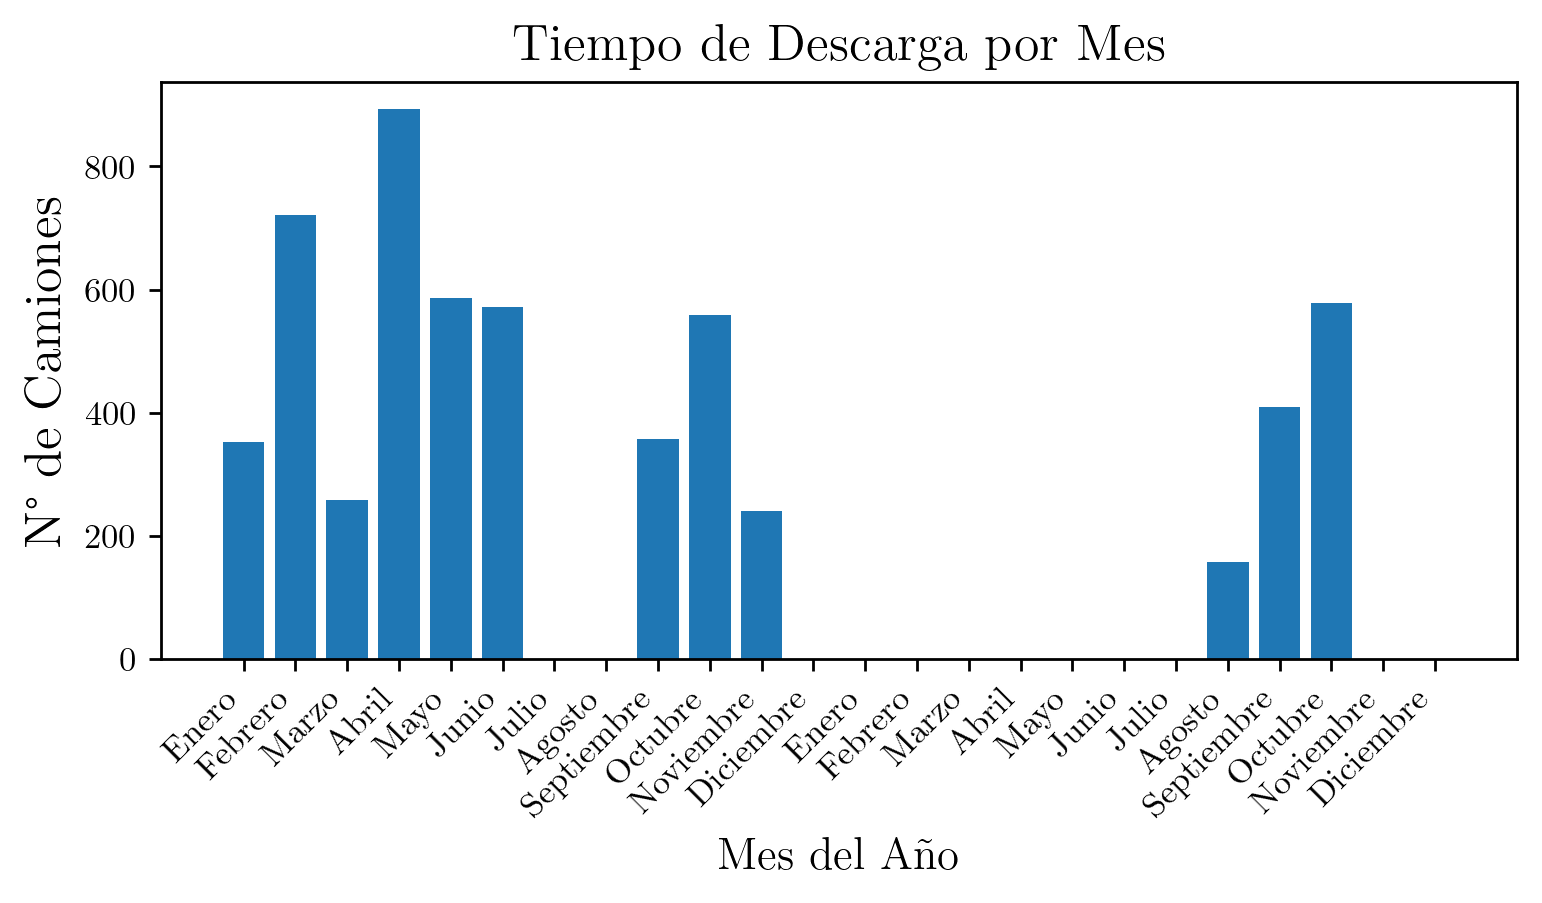

In [33]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "Viajes")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


plt.show()
#ax1.set_ylim([0,1200])


#for i, label in enumerate(perc):
   # plt.annotate(str(round(label,1))+"\%", (i-0.3, pdf[i]+17.))

#plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")  

In [34]:
T_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss["Tiempo Total en Puerto"][(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].mean()
        T_mes.append(a)

T_mes = np.nan_to_num(np.array(T_mes))
T_mes 

array([108.3802644 ,  84.7221914 ,  83.05781654, 100.55851064,
        92.52977816, 111.39254079,   0.        ,   0.        ,
       121.67192737, 104.47191413,  88.12618056,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  50.70031847,
        69.22102689,  79.45322953,   0.        ,   0.        ])

In [35]:
T_mes_pond = (T_mes*N_mes).sum()/N_mes.sum()
T_mes_pond

93.91511846117858

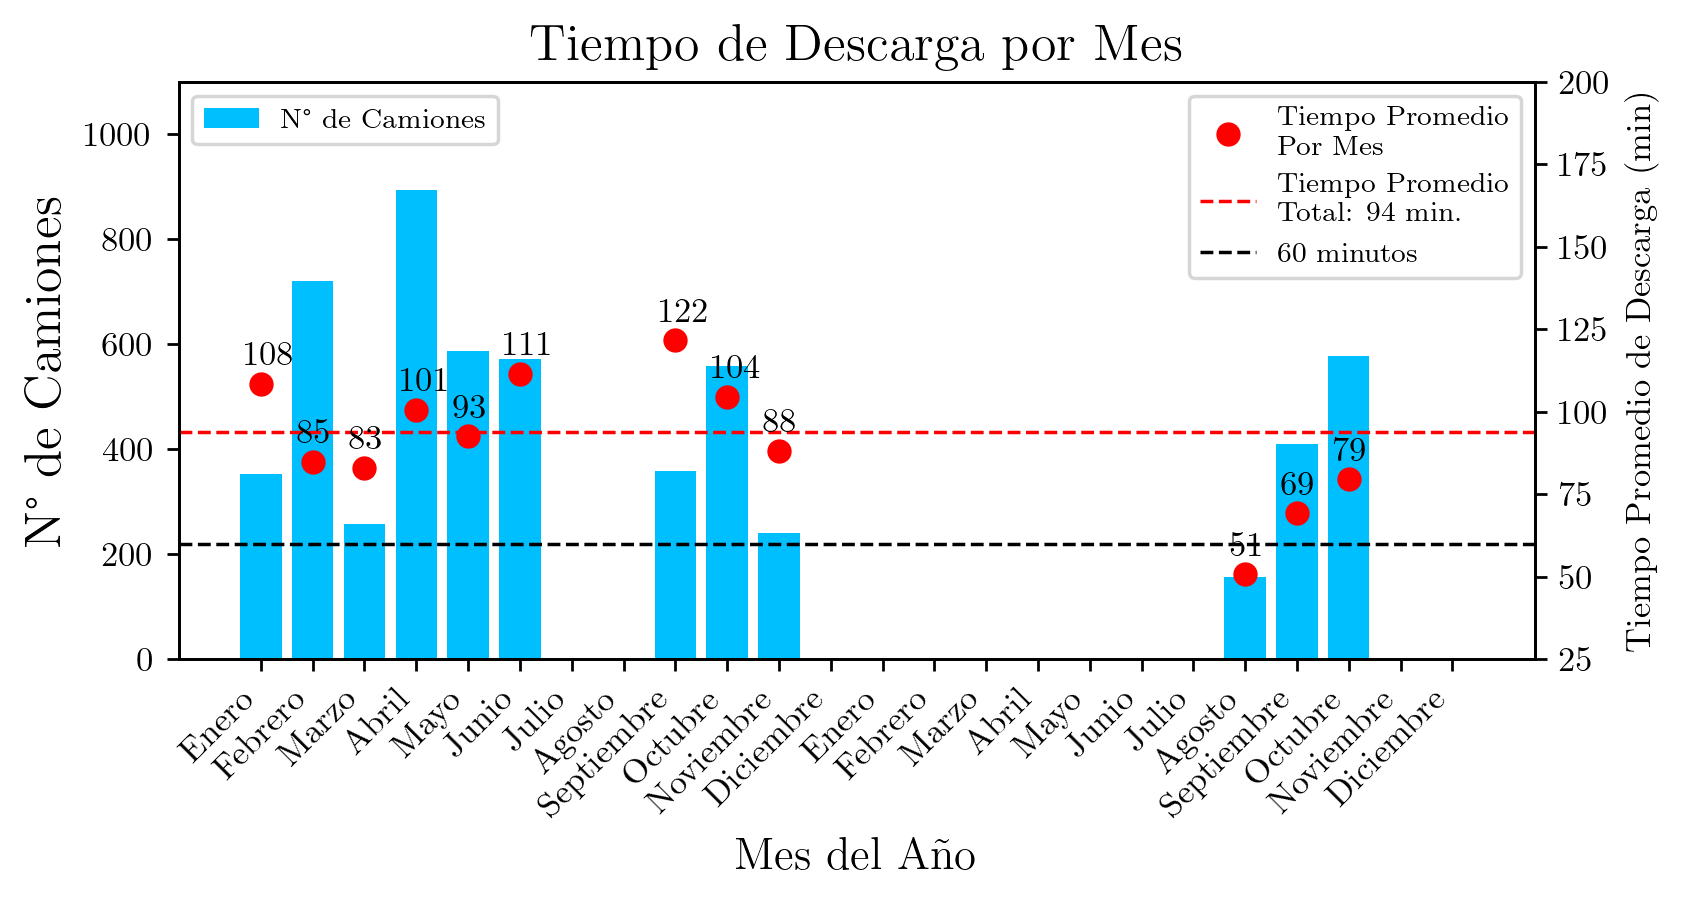

In [36]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,1100])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(idx, T_mes, "ro", label = "Tiempo Promedio \n Por Mes")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_mes_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_mes_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,200])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_mes):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.3, T_mes[i]+5.7))


plt.savefig("Graficos/Tiempos de Descarga por Mes.png", bbox_inches= "tight")

plt.show()

In [141]:
T_bloque_1 = (T_mes[:6]*N_mes[:6]).sum()/N_mes[:6].sum()
T_bloque_2 = (T_mes[8:11]*N_mes[8:11]).sum()/N_mes[8:11].sum()
T_bloque_3 = (T_mes[19:22]*N_mes[19:22]).sum()/N_mes[19:22].sum()

In [142]:
T_bloque_1, T_bloque_2, T_bloque_3

(97.10599566459781, 106.40331316623582, 71.84905303030571)

In [88]:
perc_mes = 100*N_evol/N_mes.sum()
perc_mes.sum()

53.764954257565094

In [ ]:
fig = plt.figure(figsize=(7,3), dpi = 350)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Camiones Descargados en Más de 1 Hora", fontsize = 15)
ax1.bar(idx, N_evol, label = "N° de Camiones")#, color = "deepskyblue"
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Semana del Año", fontsize = 15)
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 40, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,600])



for i, label in enumerate(perc_mes):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.5, N_evol[i]+10.7), fontsize=7, rotation = 30)


#plt.savefig("Graficos/Tiempos de Descarga por Semana.png", bbox_inches= "tight")

#plt.show()

### 4 - Tiempos de Descarga por Semana

In [ ]:
df_ss["Semana del Año"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"]).dt.isocalendar().week

In [ ]:
def Semana(date):
    fecha = date.isocalendar()
    string = str(fecha[0])+"-"+str(fecha[1])
    return string

In [ ]:
df_ss["Semana del Año"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Semana(x))

In [ ]:
df_ss.head(1)

In [ ]:
semanas = df_ss["Semana del Año"].unique()
semanas.size

In [ ]:
N_sem = np.array([df_ss[df_ss["Semana del Año"]==i].shape[0] for i in semanas])
N_sem.size

In [ ]:
T_sem = np.array([df_ss["Tiempo Total en Puerto"][df_ss["Semana del Año"]==i].mean() for i in semanas])
T_sem.size

In [ ]:
T_sem_pond = (T_sem*N_sem).sum()/N_sem.sum()
T_sem_pond

In [ ]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Tiempo de Descarga por Semana del Año", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Semana del Año", fontsize = 15)
ax1.bar(semanas, N_sem, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(semanas)
ax1.set_xticklabels(semanas, rotation = 90, fontsize = 7, 
                    fontdict = {"horizontalalignment": "center"})
ax1.set_ylim([0,360])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(semanas, T_sem, "ro", label = "Tiempo Promedio \n Por Semana", markersize = 4)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_sem_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_sem_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,1300])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_sem):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.4, label+40.7), fontsize=7, rotation = 30)


plt.savefig("Graficos/Tiempos de Descarga por Semana.png", bbox_inches= "tight")

plt.show()

In [ ]:
df_ss[df_ss["Semana del Año"]=="2020-26"].head(3)

### 5 - Camiones Por Rango Horario

In [38]:
df_ss["Rango Horario en Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

In [39]:
df_ss["Fecha de Ingreso a Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: x.date())

In [40]:
df_ss.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16


In [41]:
rangos = [str(i)+"-"+str(i+1) for i in range(24)] 

In [42]:
fechas = df_ss["Fecha de Ingreso a Puerto"].unique()
fechas.shape

(226,)

In [43]:
N_horas = [[] for i in rangos]

In [44]:
N_hrs = []
for i, vali in enumerate(rangos):
    suma = 0
    for j, valj in enumerate(fechas):
        a = df_ss[(df_ss["Rango Horario en Puerto"]==vali) & 
                  (df_ss["Fecha de Ingreso a Puerto"]==valj)].shape[0]
        suma += a
        N_horas[i].append(a)
    N_hrs.append(suma)

In [45]:
N_hrs = np.array(N_hrs)
N_hrs.sum()

5684

In [46]:
perc_hrs = 100*N_hrs/N_hrs.sum()

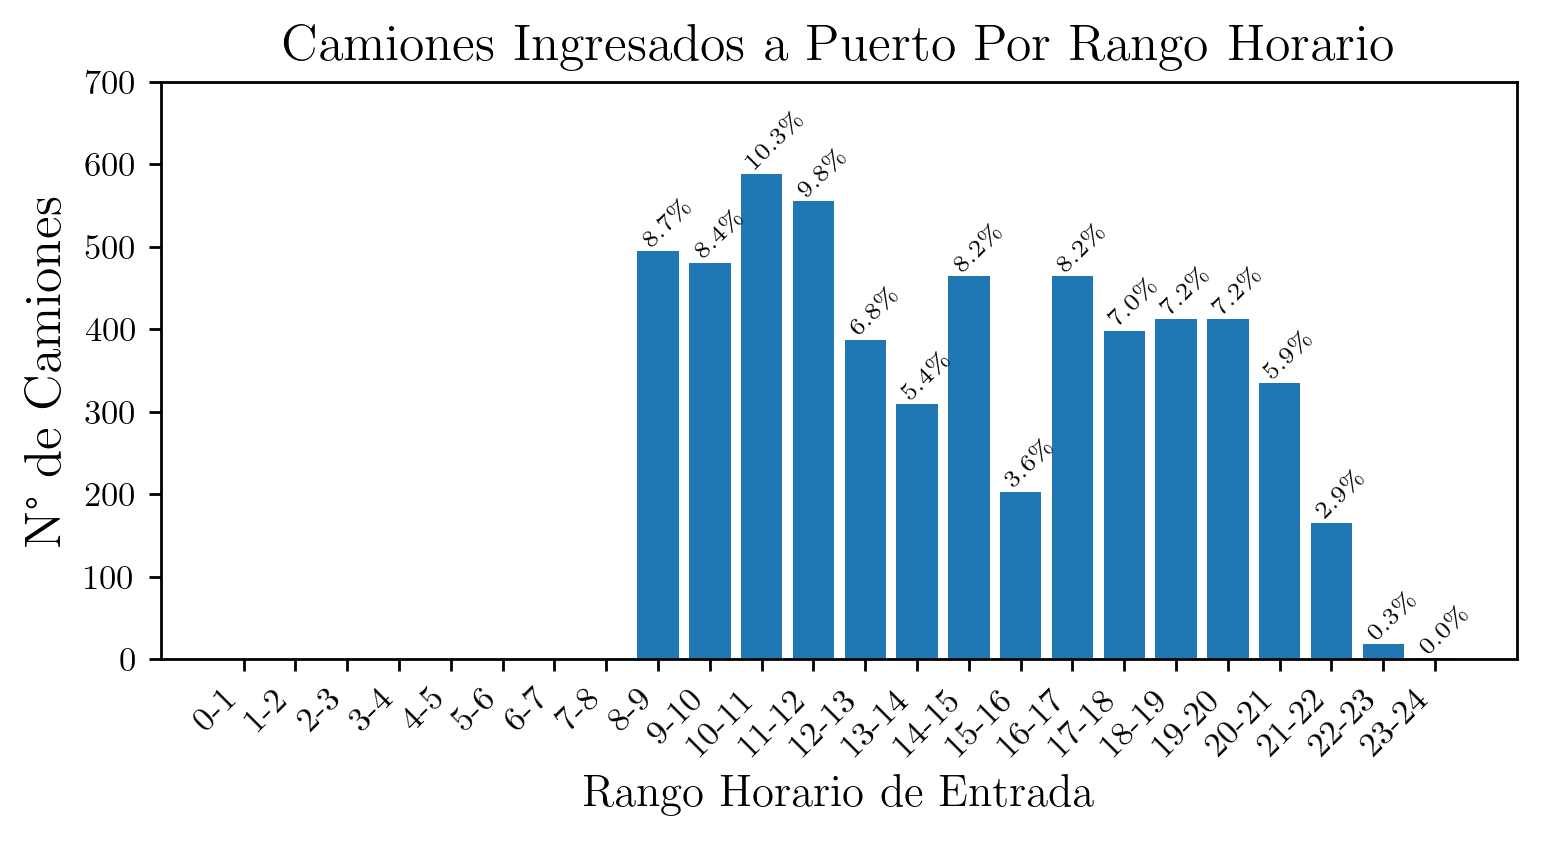

In [47]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(rangos, N_hrs, label = "Viajes")
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,700])


for i, label in enumerate(perc_hrs):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs[i]+5.15), 
                     fontsize = 7, rotation = 45)


plt.show()
#plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")  

In [48]:
rangos_2 = ["0-8"] + rangos[8:]
N_hrs_2 = N_hrs[7:]
perc_hrs_2 = 100*N_hrs_2/N_hrs_2.sum()

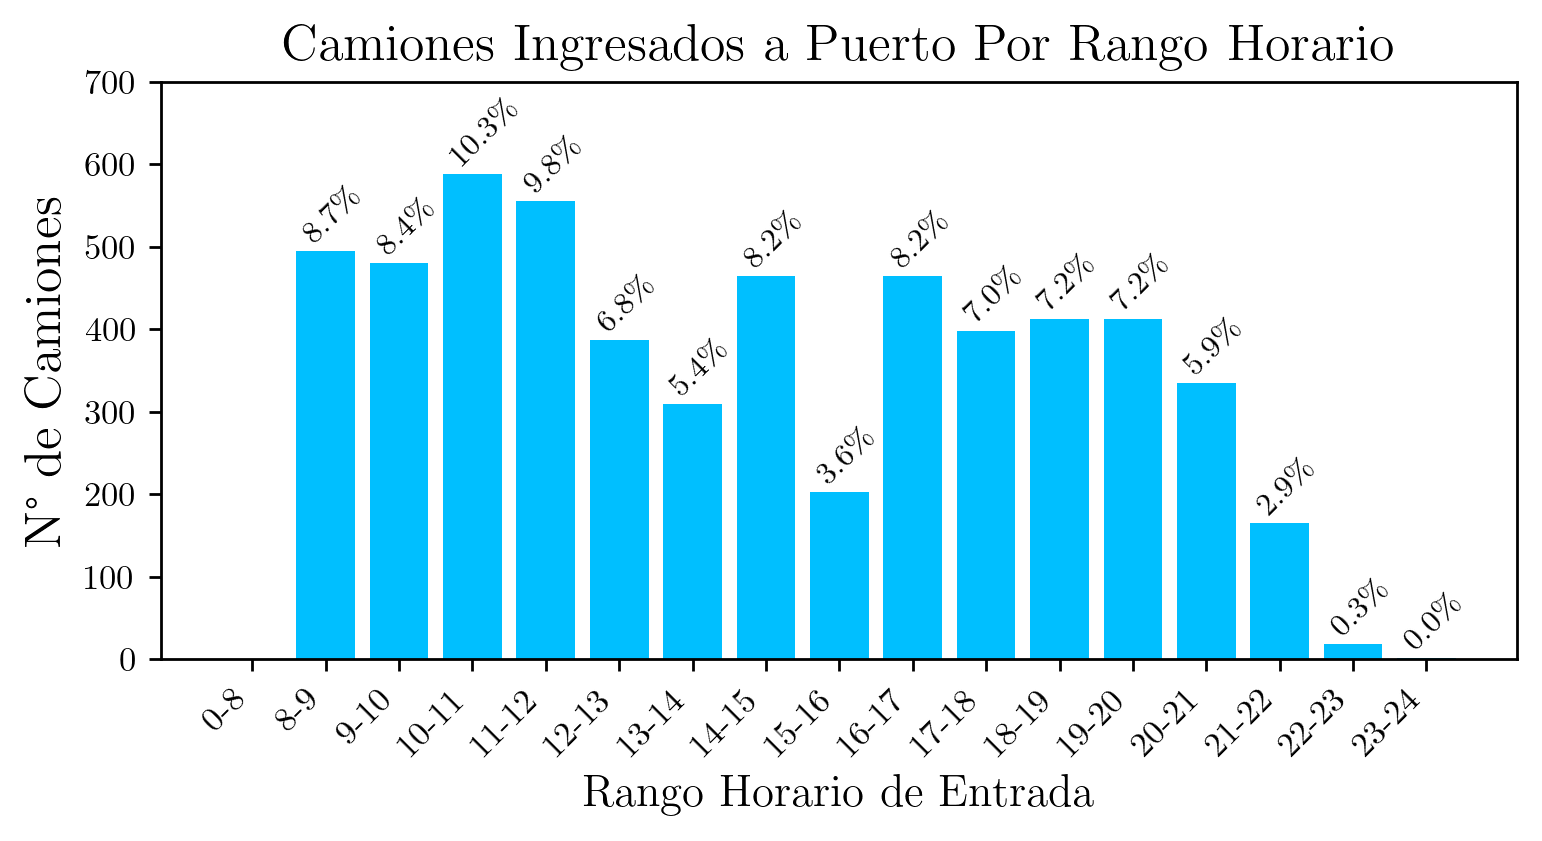

In [49]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(rangos_2, N_hrs_2, color = "deepskyblue")
ax1.set_xticks(rangos_2)
ax1.set_xticklabels(rangos_2, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,700])


for i, label in enumerate(perc_hrs_2):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs_2[i]+10.15), 
                     fontsize = 9, rotation = 45)

plt.savefig("Graficos/Camiones En Puerto Por Rango Horario.png", bbox_inches= "tight")  
plt.show()

### 6 - Histograma de Tiempos de Espera

In [50]:
def Nocturno(t):
    if t > datetime.time(23,0,0):
        return True
    elif t < datetime.time(8,0,0):
        return True
    else: 
        return False

In [51]:
df_ss["Turno Nocturno"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Nocturno(x.time()))

In [52]:
df_ss[df_ss["Turno Nocturno"] == True]

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
5876,SSR-C,20211015 19:43:18,206.866667,2021-10-15 23:10:10,18.816667,Post,Octubre,2021,23-24,2021-10-15,True


In [53]:
df_ss.head()

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False
3,NPC-R SOLAR,20200115 21:43:32,834.300000,2020-01-16 11:37:50,130.766667,T1B,Enero,2020,11-12,2020-01-16,False
4,NPC-R SOLAR,20200115 20:27:45,103.216667,2020-01-15 22:10:58,31.000000,T2D,Enero,2020,22-23,2020-01-15,False


In [54]:
df_espera = df_ss[df_ss["Hora Legada a Espera"].notna() & df_ss["Tiempo Espera [minutos]"].notna()]

In [55]:
df_espera.shape

(5679, 11)

In [56]:
import datetime as td
def Minutos_Sobrantes(t):
    if t.time() < td.time(8,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(14,0,0):
        return 0.
    elif t.time() < td.time(15,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 15, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(22,30,0):
        return 0.
    else:
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0) + td.timedelta(days=1)
        dt = (t_aux - t).total_seconds()/60.
        return dt

In [57]:
df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])

<ipython-input-57-d9d185a0ea9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])


In [58]:
df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))

<ipython-input-58-c9a0c46d32fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))


In [59]:
df_espera["Tiempo Espera Limpio"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]

<ipython-input-59-6d2d2fc4659d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]


In [60]:
T_espera = df_espera["Tiempo Espera Limpio"][df_espera["Tiempo Espera Limpio"]>0]
T_espera.max()

1756.9

In [61]:
Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(15*118)
h, b = np.histogram(T_espera, bins=Bins)

In [62]:
bins = []
for i in range(len(b[:-5])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-30h"])
bins

array(['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105',
       '105-120', '120-135', '135-150', '150-165', '165-180', '180-195',
       '195-210', '210-225', '225-4h', '4h-8h', '8h-16h', '16h-30h'],
      dtype='<U7')

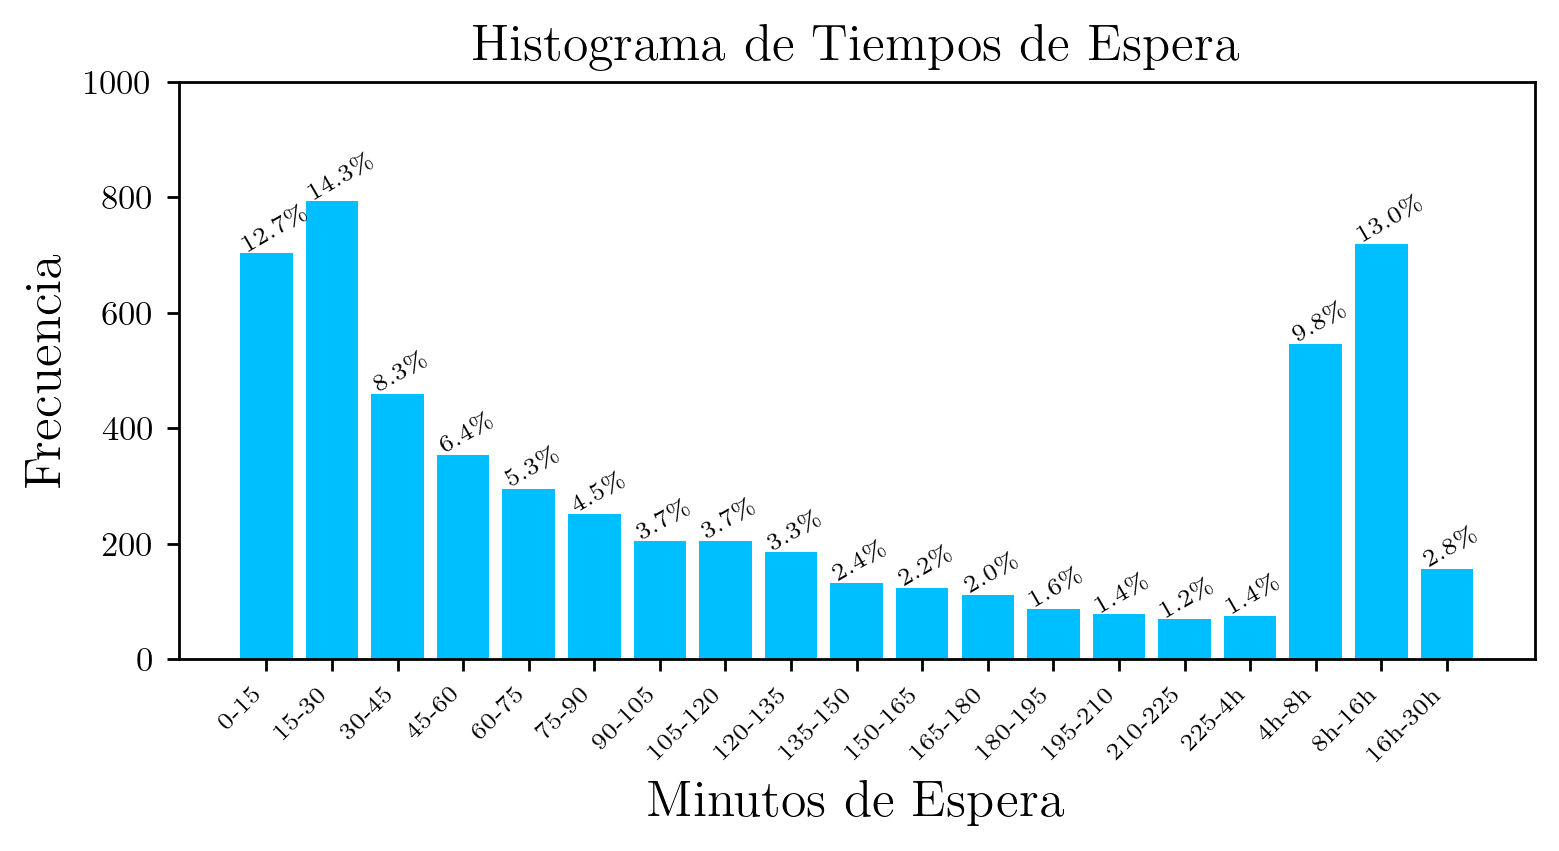

In [63]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,1000])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

In [64]:
df_clean[df_clean["Tiempo Espera Limpio"]>960].shape

NameError: name 'df_clean' is not defined

In [ ]:
100*1422/5549

### 7 - Tiempos de Espera Promedio Segun Hora de Llegada

In [66]:
df_clean = df_espera[df_espera["Tiempo Espera Limpio"]>0]

In [67]:
df_clean.shape

(5549, 13)

In [68]:
df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

<ipython-input-68-9357ba486778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))


In [69]:
df_clean.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio,Rango Horario en Espera
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.350000,20-21
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,891.466667,20-21
2,NPC-R SOLAR,2020-01-15 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.416667,20-21


In [70]:
N_rangos = np.array([df_clean[df_clean["Rango Horario en Espera"] == i].shape[0] for i in rangos])

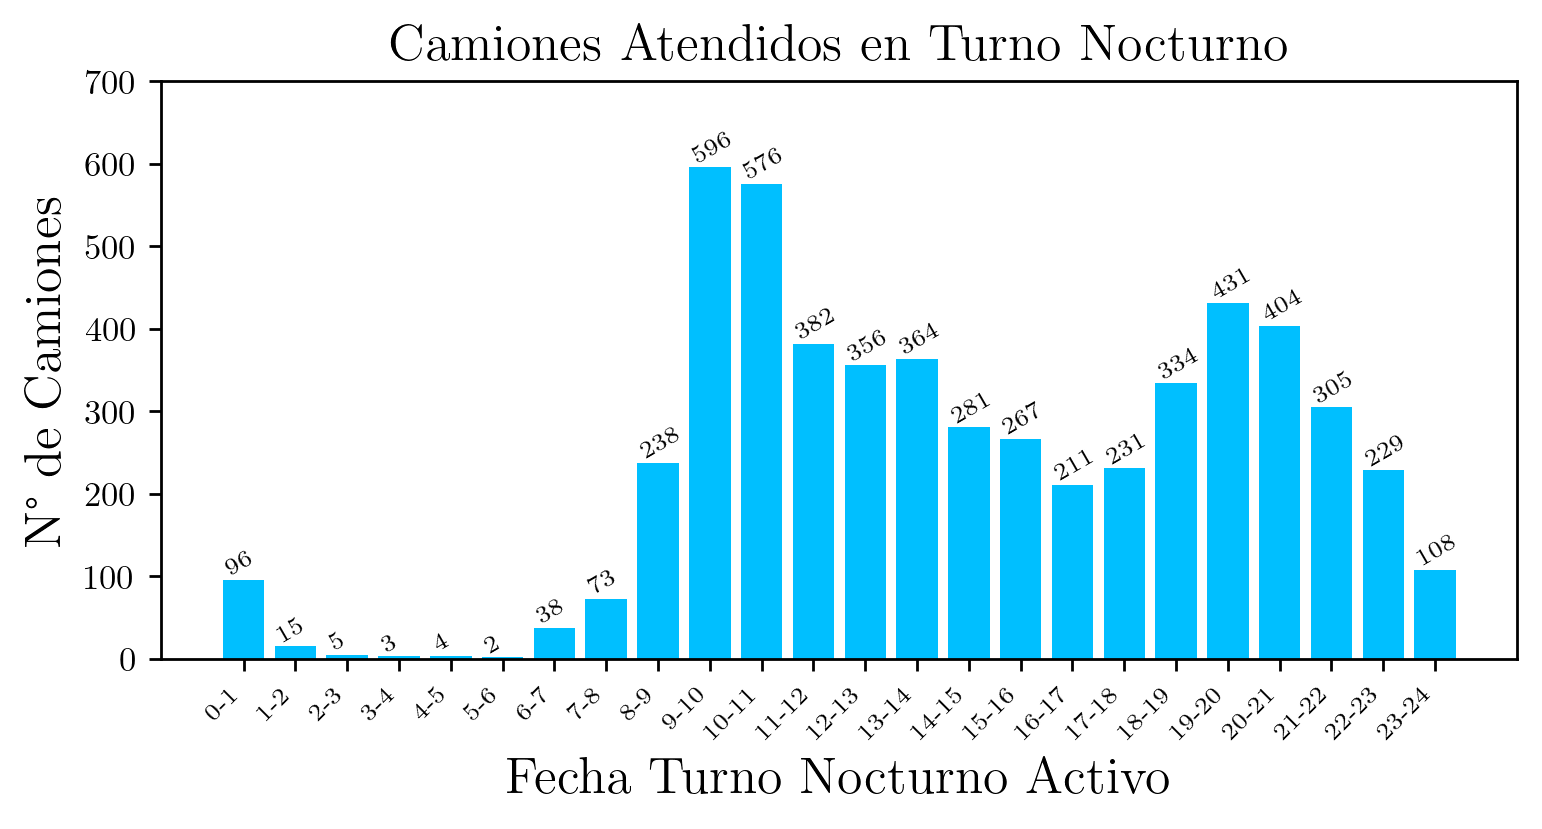

In [71]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(rangos, N_rangos, color = "deepskyblue") # 
ax2.set_title("Camiones Atendidos en Turno Nocturno", fontsize = 15)
ax2.set_ylabel("N° de Camiones", fontsize = 15)

ax2.set_xticks(rangos)
ax2.set_xticklabels(rangos, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Fecha Turno Nocturno Activo", fontsize = 15)
ax2.set_ylim([0,700])

for i, label in enumerate(N_rangos):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.4, label+5.5), 
                     fontsize = 7, rotation = 30)

In [72]:
T_rangos = np.array([df_clean["Tiempo Espera Limpio"][df_clean["Rango Horario en Espera"] == i].mean() for i in rangos])

In [73]:
T_rangos = np.nan_to_num(T_rangos)
T_rangos

array([142.97065972, 190.45777778, 166.40333333, 225.32222222,
       155.65      ,  36.15833333, 174.89078947, 115.94885845,
       159.8530112 , 134.31512864, 159.6021412 , 161.80702443,
       151.3289794 , 143.46007326, 137.03534994, 149.31235955,
       173.07156398, 177.81926407, 156.88333333, 257.4491106 ,
       352.19480198, 618.75076503, 497.45531295, 107.05169753])

In [74]:
T_rangos_pond = (T_rangos*N_rangos).sum()/N_rangos.sum()

In [75]:
idx = []
T_rang = []
for i, val in enumerate(T_rangos):
    if val != 0:
        idx.append(i)
        T_rang.append(val)
T_rang = np.array(T_rang)
T_rang

array([142.97065972, 190.45777778, 166.40333333, 225.32222222,
       155.65      ,  36.15833333, 174.89078947, 115.94885845,
       159.8530112 , 134.31512864, 159.6021412 , 161.80702443,
       151.3289794 , 143.46007326, 137.03534994, 149.31235955,
       173.07156398, 177.81926407, 156.88333333, 257.4491106 ,
       352.19480198, 618.75076503, 497.45531295, 107.05169753])

In [76]:
T_rangos

array([142.97065972, 190.45777778, 166.40333333, 225.32222222,
       155.65      ,  36.15833333, 174.89078947, 115.94885845,
       159.8530112 , 134.31512864, 159.6021412 , 161.80702443,
       151.3289794 , 143.46007326, 137.03534994, 149.31235955,
       173.07156398, 177.81926407, 156.88333333, 257.4491106 ,
       352.19480198, 618.75076503, 497.45531295, 107.05169753])

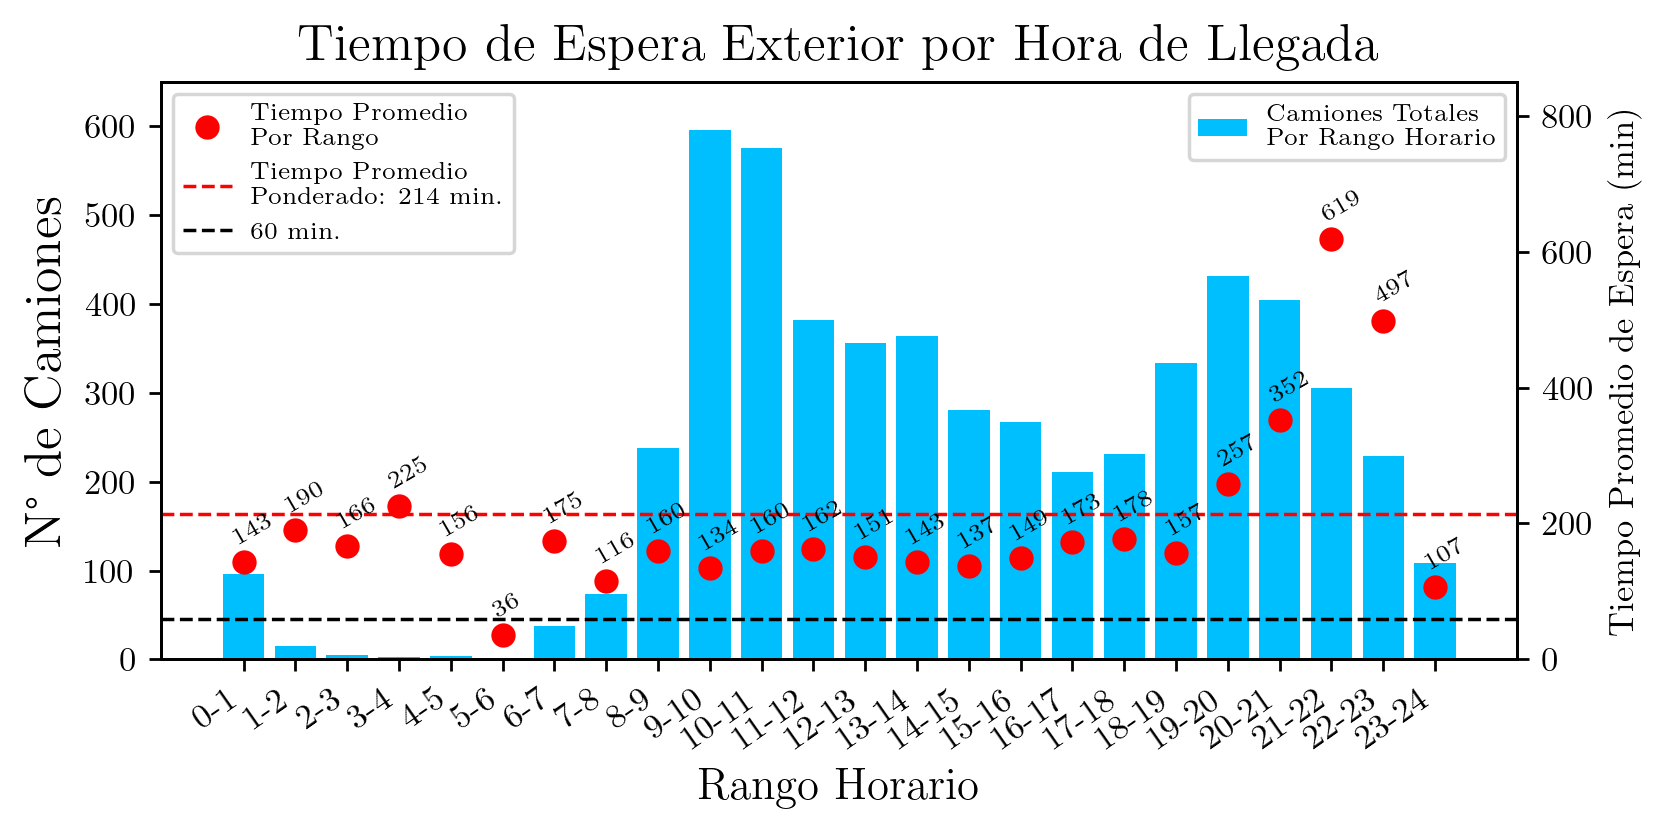

In [77]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, N_rangos, label = "Camiones Totales \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Tiempo de Espera Exterior por Hora de Llegada", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.legend(loc = "upper right",fontsize = 7)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,650])
#ax2.legend(fontsize = 7)



ax2 = ax1.twinx() 

ax2.plot(idx, T_rang, "ro", label = "Tiempo Promedio \n Por Rango")
ax2.set_ylabel("Tiempo Promedio de Espera (min)", fontsize = 10)
ax2.axhline(y = T_rangos_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Ponderado: "+ str(round(T_rangos_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 min.")

ax2.set_ylim([0,850])
ax2.legend(loc = "upper left",fontsize = 7)



for i, label in enumerate(T_rangos):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.25, label+25.9), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Tiempos de Espera Por Hora de LLegada.png", bbox_inches= "tight")

### 8 - Camiones En Espera Promedio Por Rango Horario

In [78]:
df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())

<ipython-input-78-865edbdc0d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())


In [79]:
fechas_espera = df_clean["Fecha de Ingreso a Espera"].unique()

In [80]:
rang_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_espera):
        a = df_clean[(df_clean["Fecha de Ingreso a Espera"] == valj) &
                    (df_clean["Rango Horario en Espera"] == vali)].shape[0]
        
        rang_mean[i].append(a)
        
len(rang_mean), len(rangos)

(24, 24)

In [81]:
rango_prom = [np.array(i).mean() for i in rang_mean]
rango_max = [np.array(i).max() for i in rang_mean]

In [82]:
idx = []
rango_prom_aux = []
for i, val in enumerate(rango_prom):
    if val != 0:
        idx.append(i)
        rango_prom_aux.append(val)
rango_prom_aux = np.array(rango_prom_aux)
rango_prom_aux

array([0.41025641, 0.06410256, 0.02136752, 0.01282051, 0.01709402,
       0.00854701, 0.16239316, 0.31196581, 1.01709402, 2.54700855,
       2.46153846, 1.63247863, 1.52136752, 1.55555556, 1.2008547 ,
       1.14102564, 0.9017094 , 0.98717949, 1.42735043, 1.84188034,
       1.72649573, 1.3034188 , 0.97863248, 0.46153846])

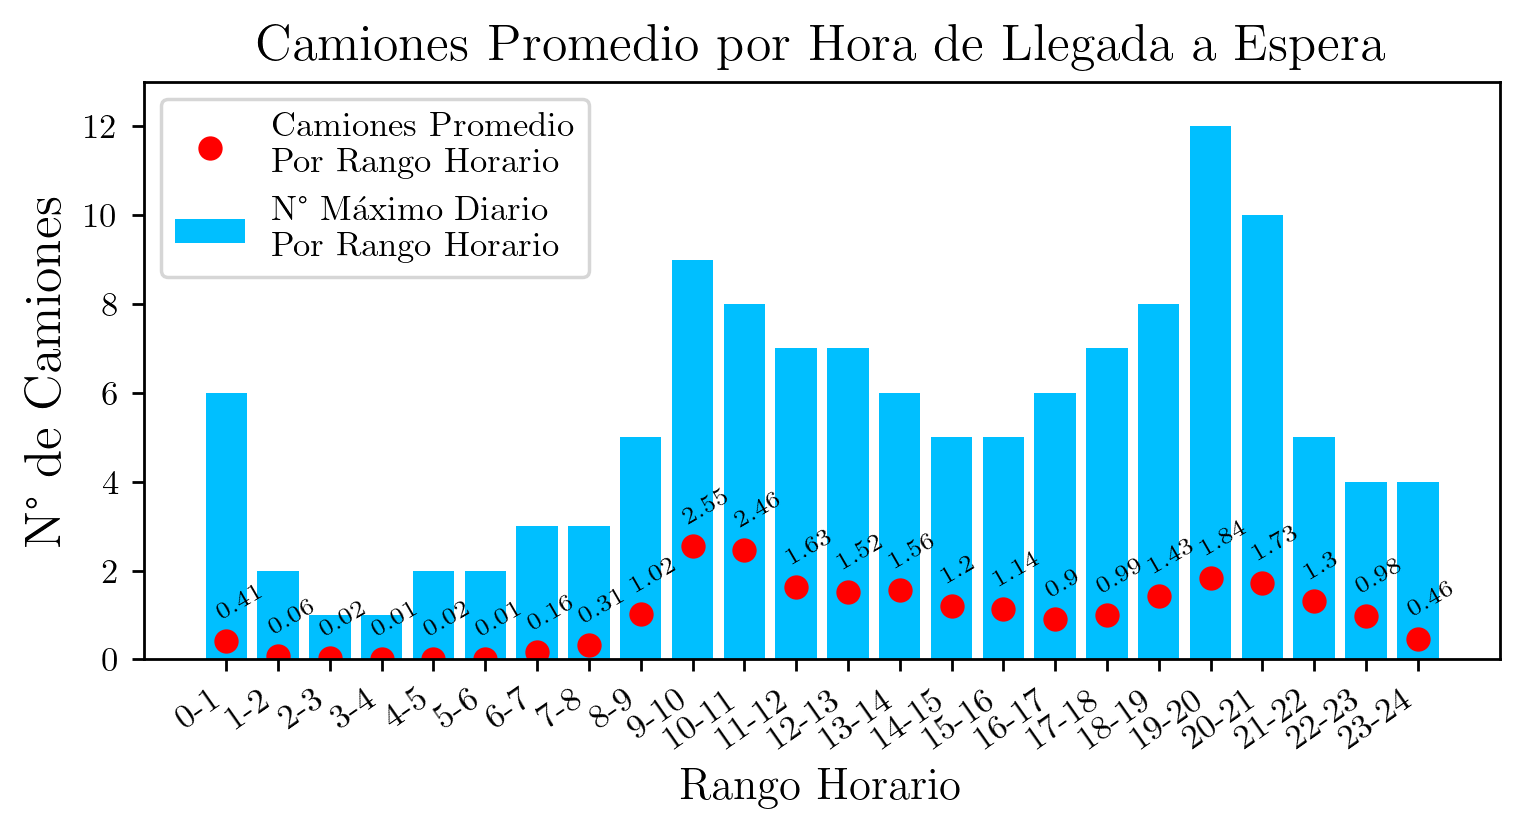

In [83]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, rango_max, label = "N° Máximo Diario \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Camiones Promedio por Hora de Llegada a Espera", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,13])
#ax2.legend(fontsize = 7)


ax1.plot(idx, rango_prom_aux, "ro", label = "Camiones Promedio \n Por Rango Horario")
ax1.legend(loc = "upper left",fontsize = 10)
#ax2.legend(loc = "upper left",fontsize = 7)


for i, label in enumerate(rango_prom):
    if label != 0:
        plt.annotate(str(round(label,2)), (i-0.25, label+0.5), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Camiones Promedio en Espera Por Rango Horario.png", bbox_inches= "tight")

### 9 - Evolución Temporal Camiones Sobre 60 min

In [84]:
df_ss.head(1)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
0,NPC-R SOLAR,20200115 20:49:19,884.35,2020-01-16 11:33:40,51.15,T1B,Enero,2020,11-12,2020-01-16,False


In [85]:
N_evol = []
for i in años:
    for j in meses[:12]:
        a = df_ss[(df_ss["Año de Descarga"] == i) &
                 (df_ss["Mes de Descarga"] == j) &
                 (df_ss["Tiempo Total en Puerto"]>60)].shape[0]
        N_evol.append(a)
N_evol = np.array(N_evol)    

In [86]:
N_evol

array([190, 375, 127, 539, 318, 292,   0,   0, 267, 317, 150,   0,   0,
         0,   0,   0,   0,   0,   0,  40, 172, 269,   0,   0])

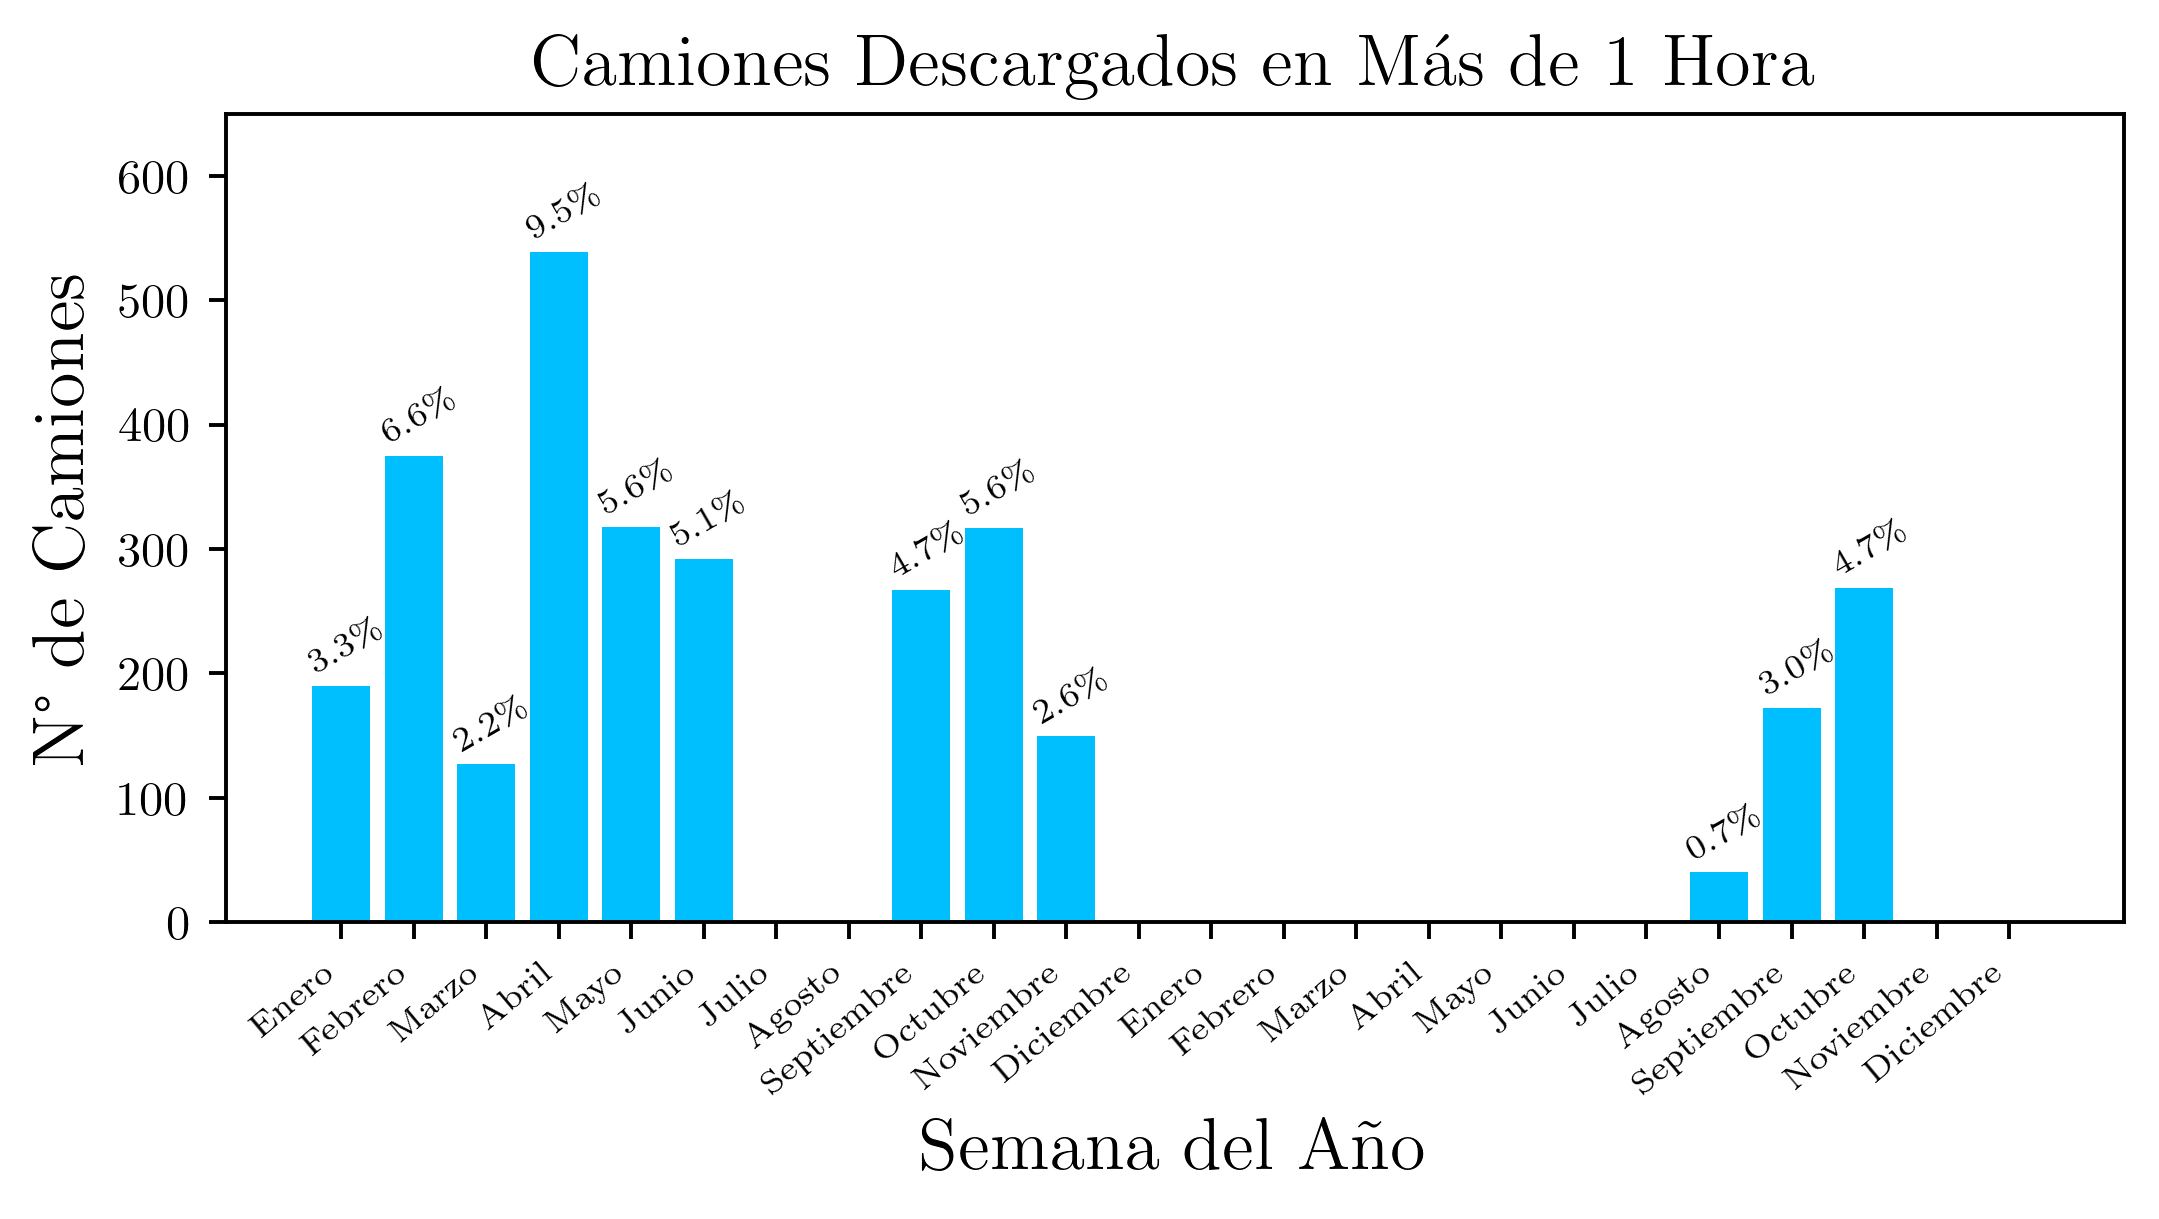

In [89]:
fig = plt.figure(figsize=(7,3), dpi = 350)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Camiones Descargados en Más de 1 Hora", fontsize = 15)
ax1.bar(idx, N_evol, label = "N° de Camiones", color = "deepskyblue")
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Semana del Año", fontsize = 15)
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 40, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,650])



for i, label in enumerate(perc_mes):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.5, N_evol[i]+10.7), fontsize=7, rotation = 30)


plt.savefig("Graficos/Descargas Sobre 60 min Porcentaje del Total.png", bbox_inches= "tight")

#plt.show()

In [90]:
perc_mes_local = np.nan_to_num(100*N_evol/N_mes)

<ipython-input-90-dc96ab8cbf37>:1: RuntimeWarning: invalid value encountered in true_divide
  perc_mes_local = np.nan_to_num(100*N_evol/N_mes)


In [91]:
perc_mes_local

array([53.82436261, 52.0110957 , 49.2248062 , 60.35834267, 54.2662116 ,
       51.04895105,  0.        ,  0.        , 74.58100559, 56.70840787,
       62.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 25.47770701,
       42.05378973, 46.53979239,  0.        ,  0.        ])

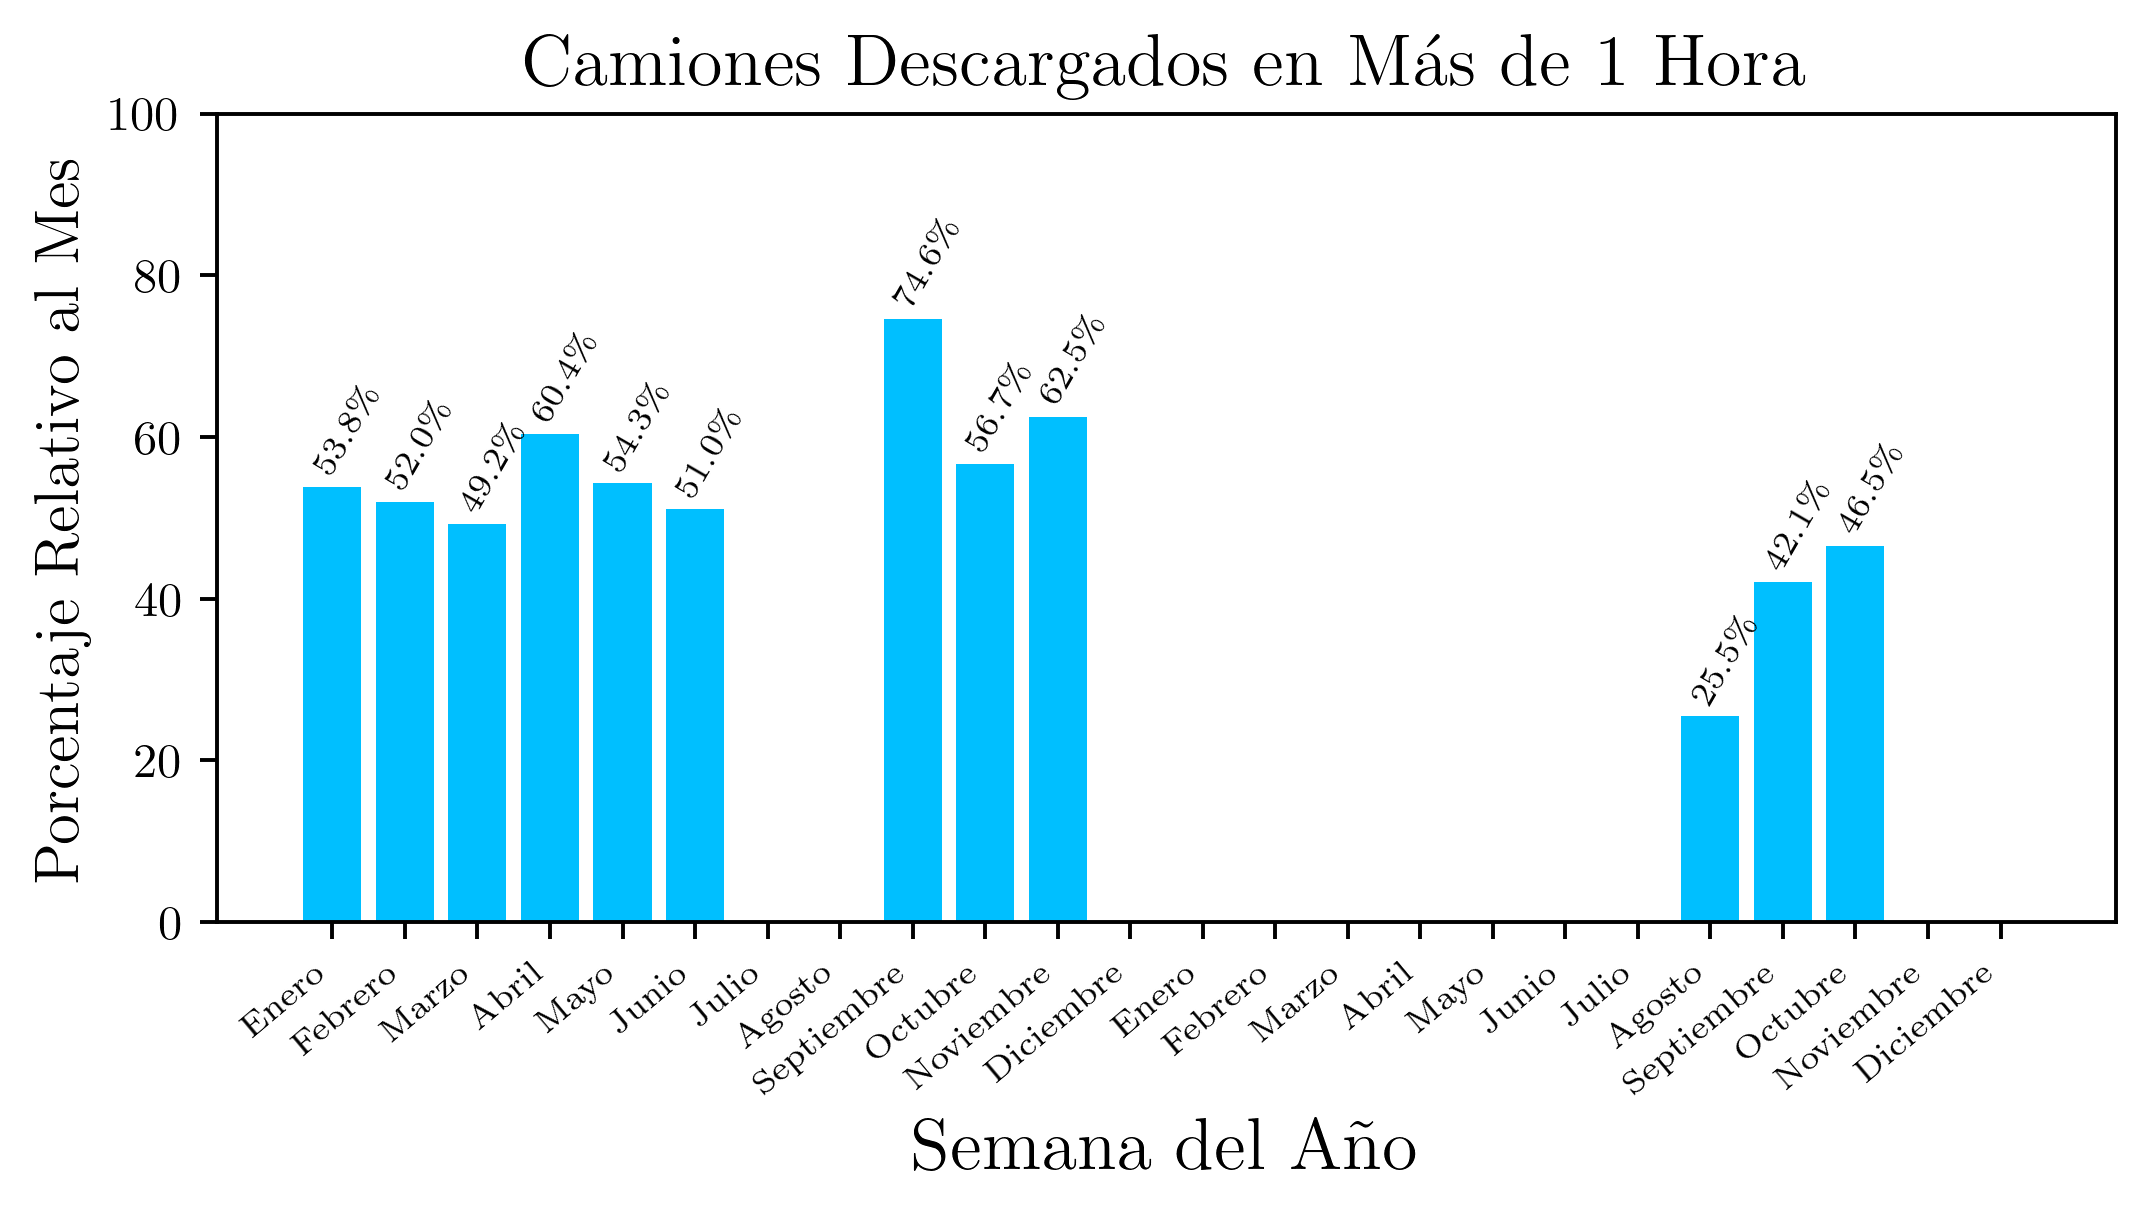

In [92]:
fig = plt.figure(figsize=(7,3), dpi = 350)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Camiones Descargados en Más de 1 Hora", fontsize = 15)
ax1.bar(idx, perc_mes_local, label = "N° de Camiones", color = "deepskyblue")
ax1.set_ylabel("Porcentaje Relativo al Mes", fontsize = 13)
ax1.set_xlabel("Semana del Año", fontsize = 15)
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 40, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,100])



for i, label in enumerate(perc_mes_local):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.3, label+1.7), fontsize=7, rotation = 60)


plt.savefig("Graficos/Descargas Sobre 60 min Porcentaje Por Mes.png", bbox_inches= "tight")

#plt.show()

In [143]:
perc_bloque_1 = (perc_mes_local[:6]*N_evol[:6]).sum()/N_evol[:6].sum()
perc_bloque_2 = (perc_mes_local[8:11]*N_evol[8:11]).sum()/N_evol[8:11].sum()
perc_bloque_3 = (perc_mes_local[19:22]*N_evol[19:22]).sum()/N_evol[19:22].sum()

In [144]:
perc_bloque_1, perc_bloque_2, perc_bloque_3

(54.686820132189965, 64.39331578581752, 43.184125293648115)

In [94]:
df_clean.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio,Rango Horario en Espera,Fecha de Ingreso a Espera
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.350000,20-21,2020-01-15
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,891.466667,20-21,2020-01-15
2,NPC-R SOLAR,2020-01-15 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.416667,20-21,2020-01-15


### Tiempos de Espera Limpios Por Mes

In [96]:
T_mes_clean = []
for i in años:
    for j in meses[:12]:
        a = df_clean["Tiempo Espera Limpio"][(df_clean["Año de Descarga"]==i) & (df_clean["Mes de Descarga"]==j)].mean()
        T_mes_clean.append(a)

T_mes_clean = np.nan_to_num(np.array(T_mes_clean))
T_mes_clean

array([193.09121037, 156.45809249, 142.53826667, 227.35109034,
       172.56938534, 135.17069892,   0.        ,   0.        ,
       294.53833805, 206.5445856 , 330.24958333,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 329.8525641 ,
       280.9964783 , 254.78907246,   0.        ,   0.        ])

In [99]:
df_clean["Año de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.year)
df_clean["Mes de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: Mes(x))

<ipython-input-99-611461df21c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Año de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.year)
<ipython-input-99-611461df21c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mes de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: Mes(x))


In [100]:
N_mes_clean = []
for i in años:
    for j in meses[:12]:
        a = df_clean[(df_clean["Año de Espera"]==i) & (df_clean["Mes de Espera"]==j)].shape[0]
        N_mes_clean.append(a)

N_mes_clean = np.array(N_mes_clean)
N_mes_clean

array([348, 695, 247, 855, 579, 543,   0,   0, 360, 553, 231,   0,   0,
         0,   0,   0,   0,   0,   0, 159, 416, 563,   0,   0])

In [101]:
T_clean_pond = (T_mes_clean*N_mes_clean).sum()/N_mes_clean.sum()
T_clean_pond

214.12318705628778

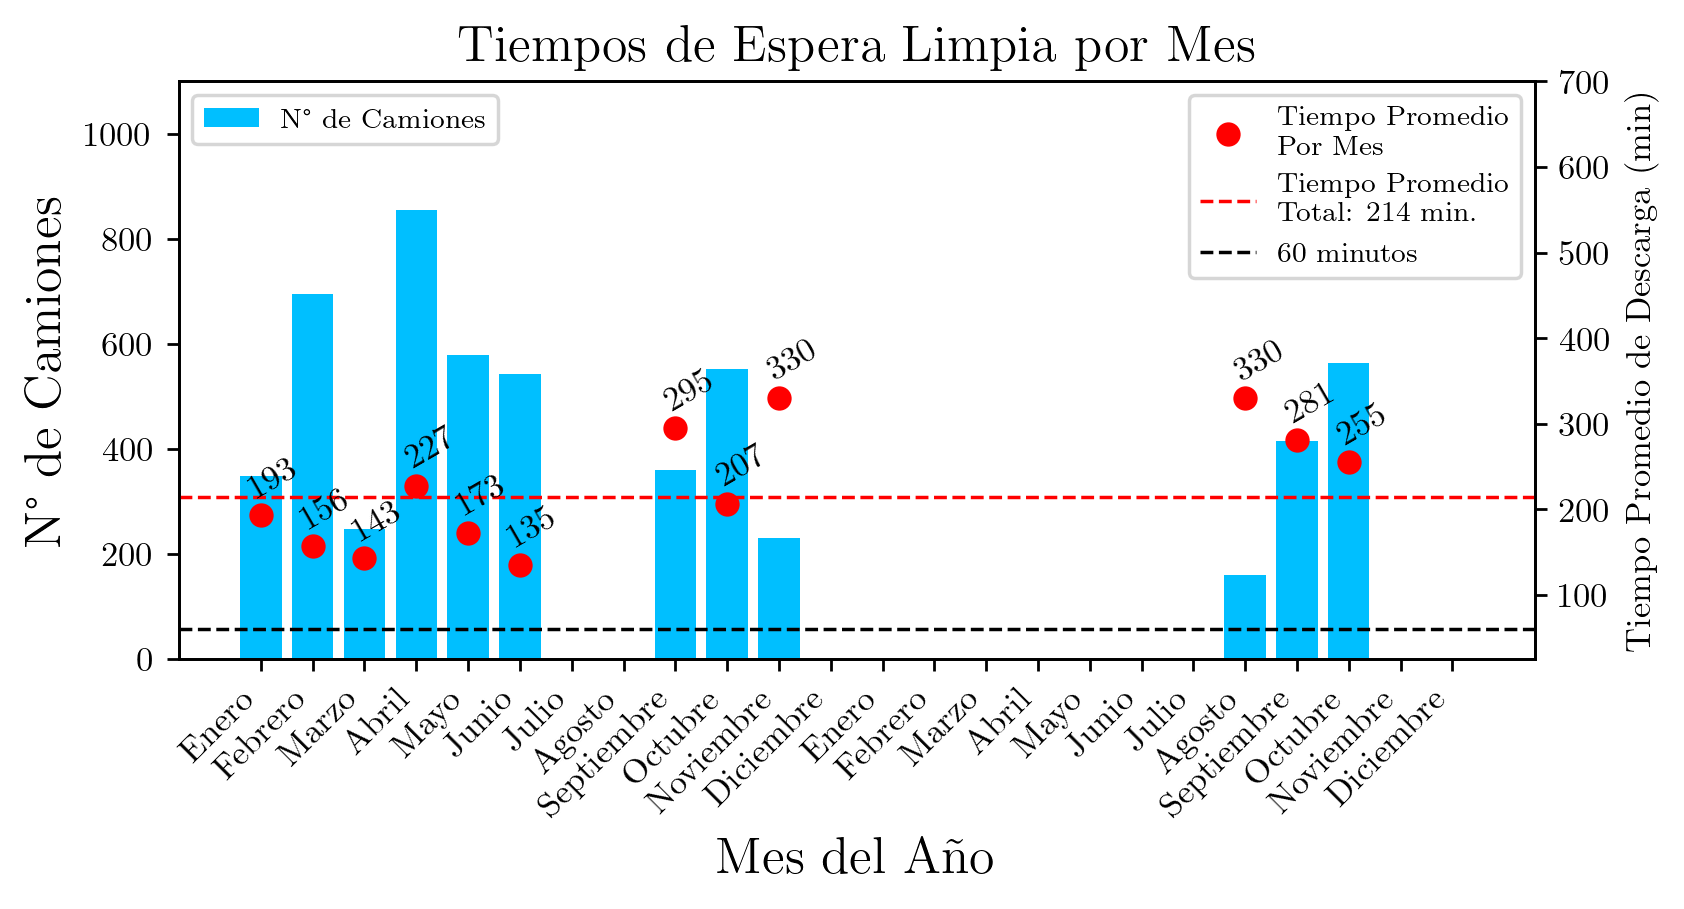

In [114]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempos de Espera Limpia por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 15)
ax1.bar(idx, N_mes_clean, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,1100])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(idx, T_mes_clean, "ro", label = "Tiempo Promedio \n Por Mes")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_clean_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_clean_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,700])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_mes_clean):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.3, label+20.7), rotation=30)


plt.savefig("Graficos/Tiempos de Espera Limpia por Mes.png", bbox_inches= "tight")

plt.show()

### Descargas por Turno en Ago-Oct

In [118]:
N_turnos_21 = np.array([df_ss[(df_ss["Turno en Puerto"] == i) & (df_ss["Año de Descarga"] == 2021)].shape[0] for i in turnos])
N_turnos_21

array([ 33, 128, 236, 128,  64, 151, 201, 139,  61,   3])

In [119]:
T_turnos_21 = np.array([df_ss["Tiempo Total en Puerto"][(df_ss["Turno en Puerto"] == i) & (df_ss["Año de Descarga"] == 2021)].mean() for i in turnos])
T_turnos_21

array([74.97575758, 60.05325521, 57.3704096 , 70.41432292, 79.3359375 ,
       68.82218543, 84.52114428, 90.77577938, 71.13333333, 22.16111111])

In [120]:
T_ponderado_21 = (N_turnos_21*T_turnos_21).sum()/N_turnos_21.sum()
T_ponderado_21

71.84905303030567

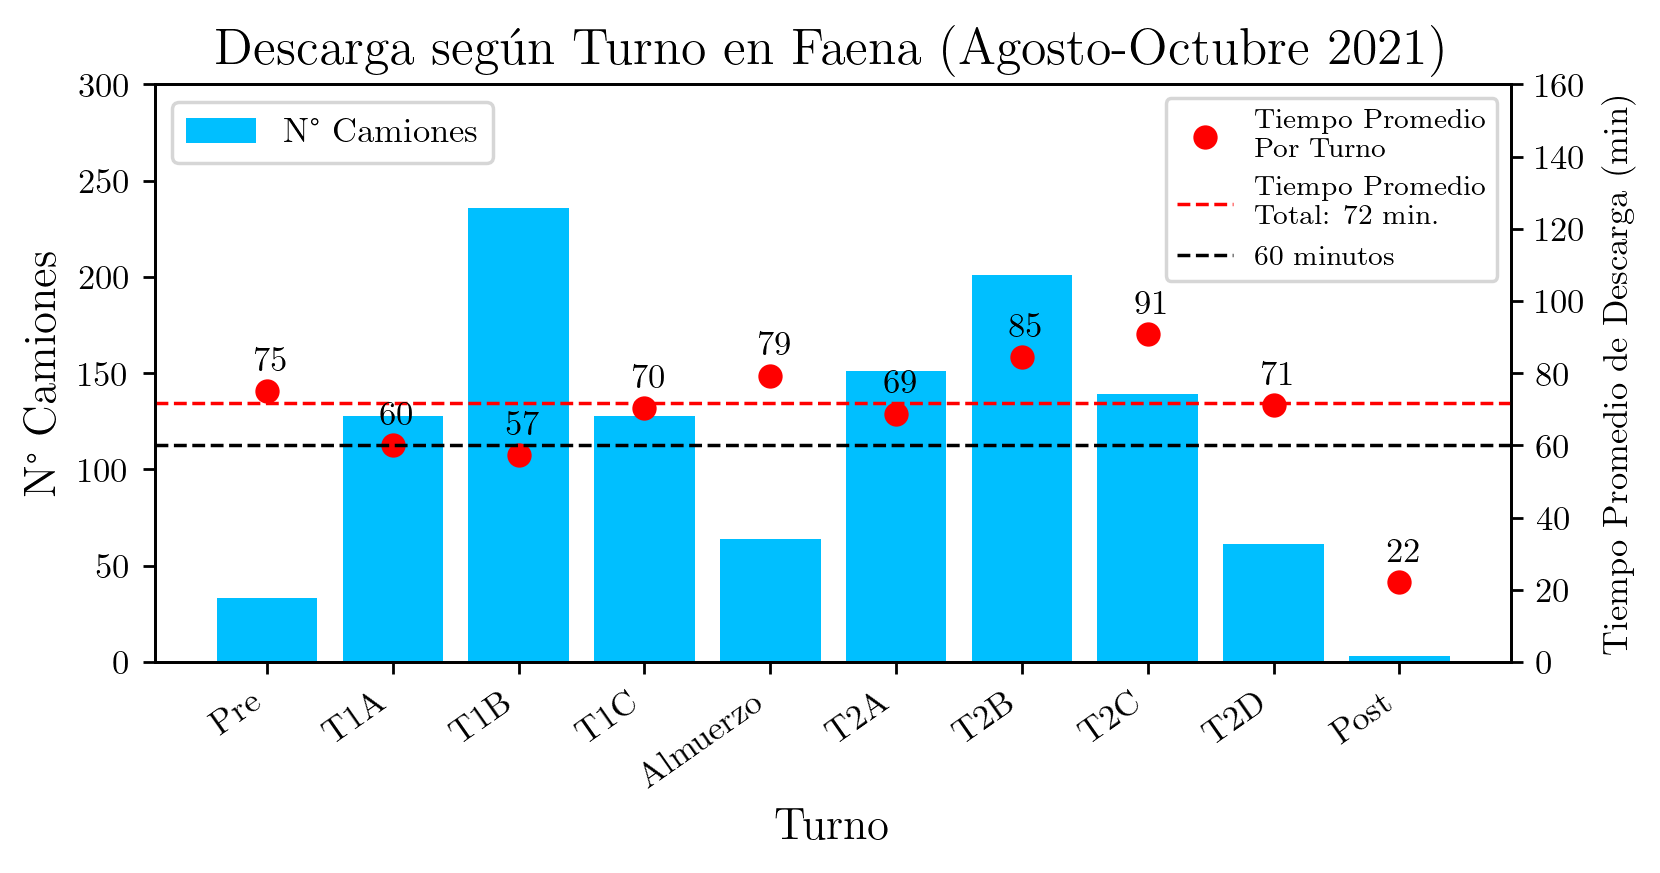

In [129]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.bar(turnos, N_turnos_21, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,300])
ax1.set_ylabel("N° Camiones", fontsize = 13)
ax1.set_xlabel("Turno", fontsize = 13)
ax1.legend(loc = "upper left")
ax1.set_xticks(turnos)
ax1.set_xticklabels(turnos, rotation = 35, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


ax2 = ax1.twinx() 

ax2.plot(turnos, T_turnos_21, "ro", label = "Tiempo Promedio \n Por Turno")
ax2.set_title("Descarga según Turno en Faena (Agosto-Octubre 2021)", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_ponderado_21, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_ponderado_21)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([0,160])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_turnos_21):
    plt.annotate(str(round(label)), (i-0.1, label+5.7))

plt.savefig("Graficos/Tiempos de Descarga por Turno (Ago-Oct 2021).png", bbox_inches= "tight")
plt.show()

### Porcentaje y Pormedio de Camiones Descargados Por Hora

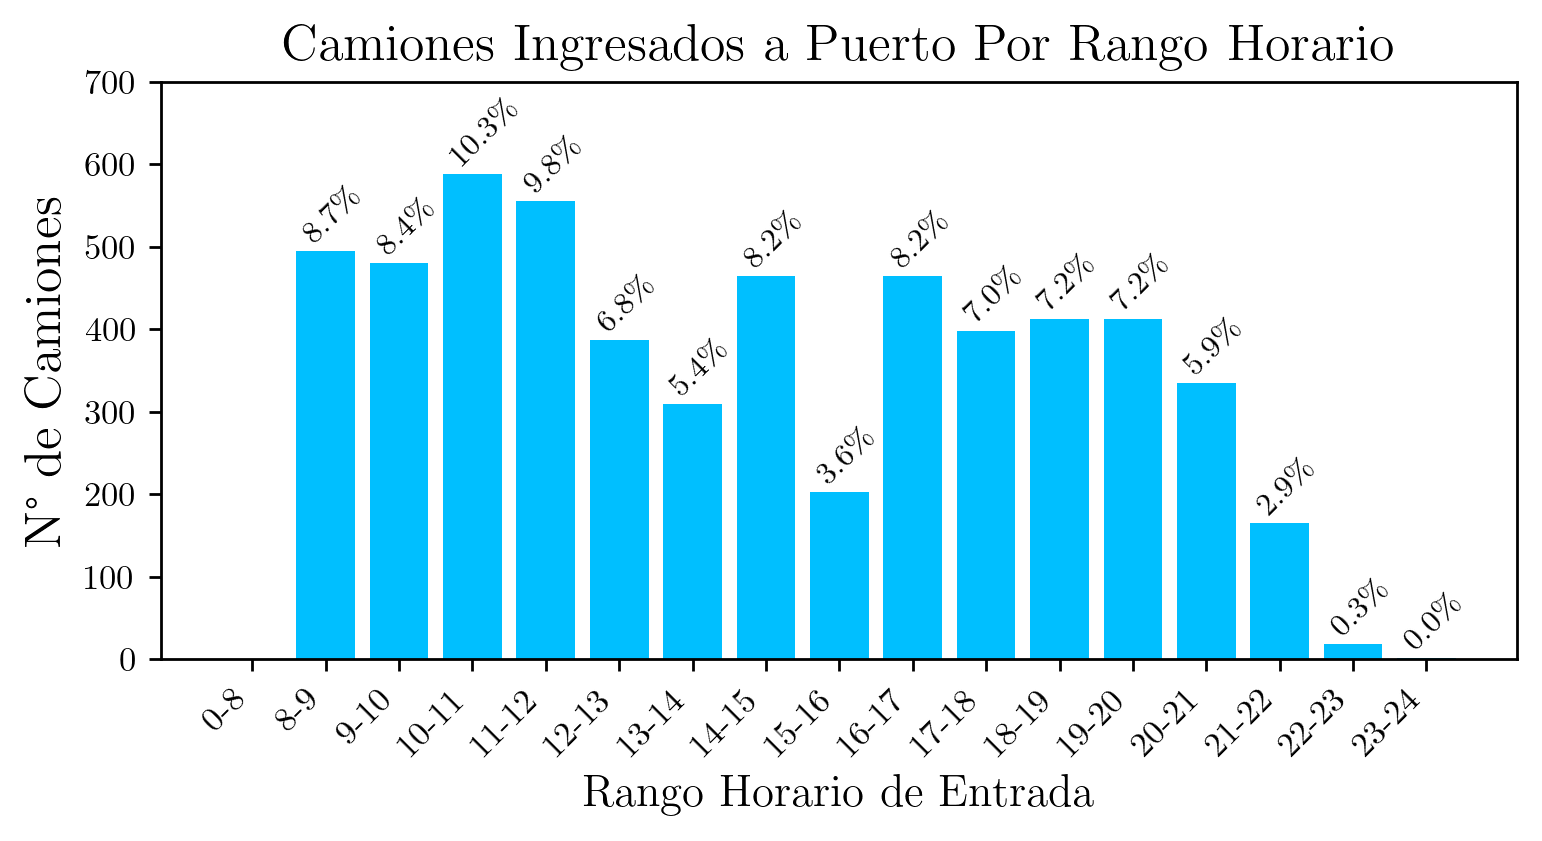

In [130]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(rangos_2, N_hrs_2, color = "deepskyblue")
ax1.set_xticks(rangos_2)
ax1.set_xticklabels(rangos_2, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,700])


for i, label in enumerate(perc_hrs_2):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs_2[i]+10.15), 
                     fontsize = 9, rotation = 45)

#plt.savefig("Graficos/Camiones En Puerto Por Rango Horario.png", bbox_inches= "tight")  
plt.show()

In [131]:
df_ss.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False


In [145]:
rang_desc_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas):
        a = df_ss[(df_ss["Fecha de Ingreso a Puerto"] == valj) &
                    (df_ss["Rango Horario en Puerto"] == vali)].shape[0]
        
        rang_desc_mean[i].append(a)

In [147]:
rang_descarga_mean = np.array([np.array(rang_desc_mean[i]).mean() for i in range(len(rang_desc_mean))])

In [150]:
rang_descarga_mean[7:]

array([0.        , 2.18584071, 2.12389381, 2.60176991, 2.45575221,
       1.71238938, 1.36725664, 2.05309735, 0.89823009, 2.05309735,
       1.76106195, 1.82300885, 1.82300885, 1.47787611, 0.7300885 ,
       0.07964602, 0.00442478])

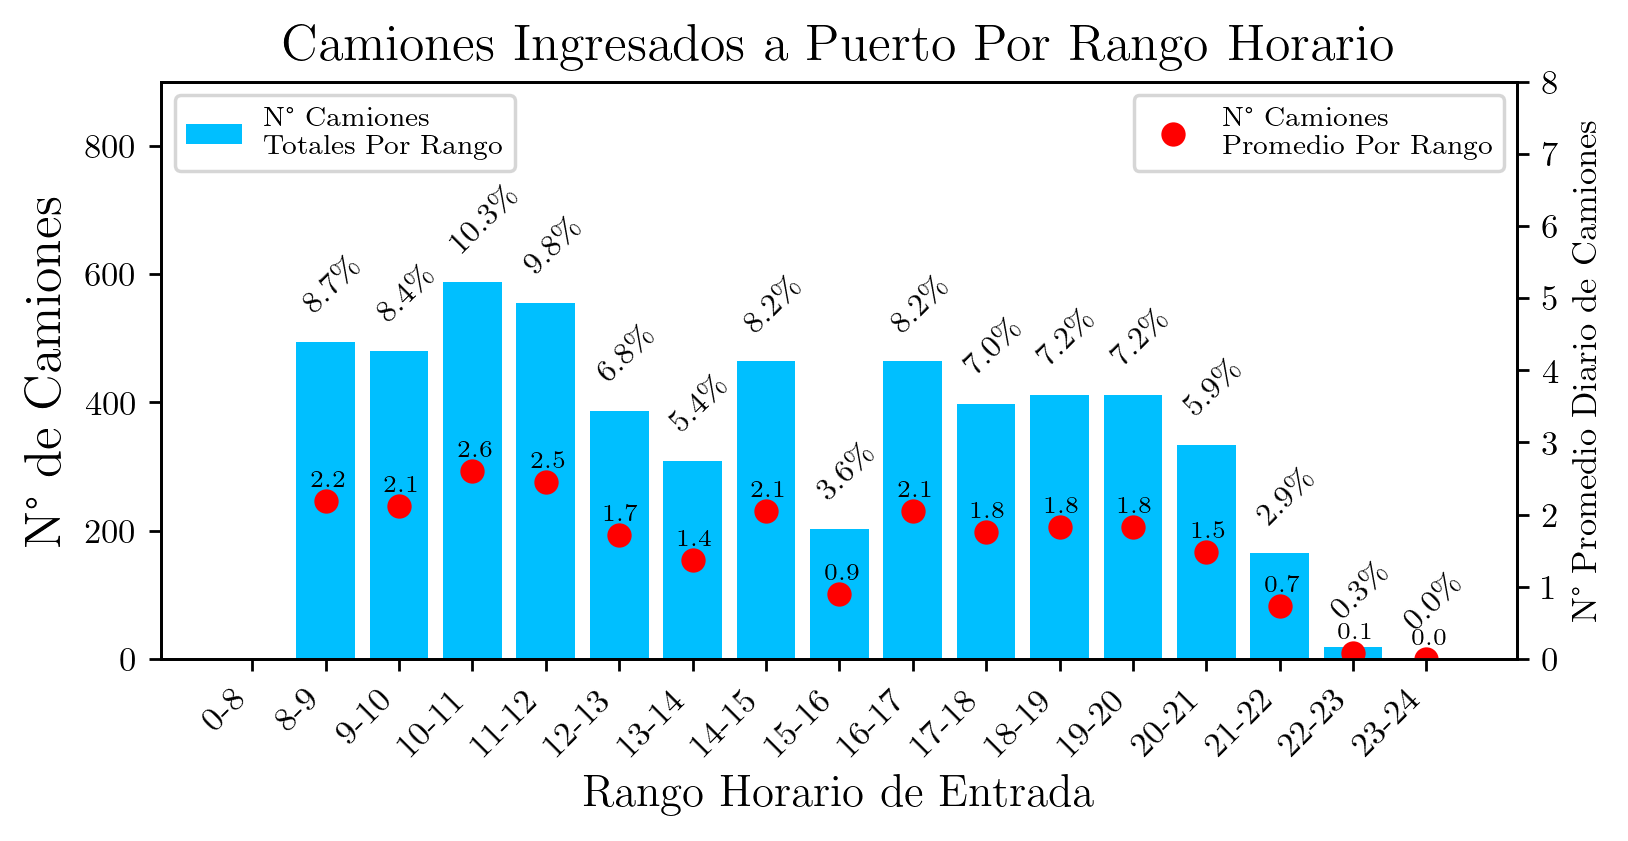

In [272]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(rangos_2))

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(idx, N_hrs_2, color = "deepskyblue", label = "N° Camiones \n Totales Por Rango ")
ax1.set_xticks(idx)
ax1.set_xticklabels(rangos_2, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,900])
ax1.legend(fontsize = 8, loc = "upper left")


for i, label in enumerate(perc_hrs_2):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs_2[i]+45.15), 
                     fontsize = 9, rotation = 45)

        
ax2 = ax1.twinx() 

ax2.plot(idx[1:], rang_descarga_mean[8:], "ro", label = "N° Camiones \n Promedio Por Rango")
ax2.set_ylabel("N° Promedio Diario de Camiones")
ax2.set_ylim([0,8])
ax2.legend(fontsize = 8, loc = "upper right")
ax2.set_xticks(idx)
ax2.set_xticklabels(rangos_2, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


for i, label in enumerate(rang_descarga_mean[7:]):
    if label != 0:
        plt.annotate(str(round(label,1)), (i-0.2, label+0.2), rotation=-0, fontsize = 7)
        
        

plt.savefig("Graficos/Camiones Promedio En Puerto Por Rango Horario.png", bbox_inches= "tight")  
plt.show()

### Cálculos Esperas Limpias Sobre 60 min

In [217]:
N_esp_2020 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2020)].shape[0]
N_esp_2020

2352

In [218]:
N_esp_2021 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2021)].shape[0]
N_esp_2021

886

In [259]:
N_esp_2020 + N_esp_2021

3238

In [214]:
N_clean_2020 = df_clean[(df_clean["Año de Espera"]==2020)].shape[0]
N_clean_2021 = df_clean[(df_clean["Año de Espera"]==2021)].shape[0]
N_clean_2020, N_clean_2021, N_clean_2020 + N_clean_2021

(4411, 1138, 5549)

In [215]:
N_clean = df_clean.shape[0]
N_clean

5549

In [216]:
100*N_esp_2020/N_clean_2020

53.32124234867377

In [219]:
100*N_esp_2021/N_clean_2021

77.85588752196837

In [222]:
100*(N_esp_2020 + N_esp_2021)/N_clean

58.35285637051721

In [249]:
df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)

<ipython-input-249-8c5caf00567a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)


In [255]:
T_perdido_2020 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2020].sum()/60.
T_perdido_2021 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2021].sum()/60.
T_perdido_2020, T_perdido_2021, T_perdido_2020 + T_perdido_2021

(11390.091388888168, 4163.284722221489, 15553.376111109657)

<AxesSubplot:>

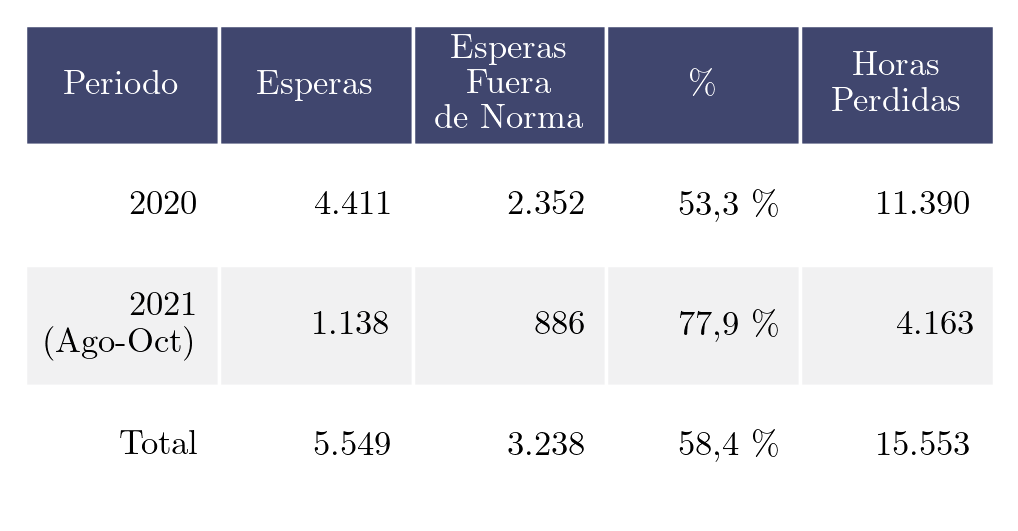

In [268]:
import six

tabla = pd.DataFrame()
tabla['Periodo'] = ['2020', '2021 \n (Ago-Oct)', 'Total']
tabla['Esperas'] = ["4.411", "1.138", "5.549"]
tabla['Esperas \n Fuera \n de Norma'] = ["2.352", "886", "3.238"]
tabla['\%'] = ["53,3 \%", "77,9 \%", "58,4 \%"]
tabla['Horas \n Perdidas'] = ["11.390", "4.163", "15.553"]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], Edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, image=False,**kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size, dpi = 250)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(Edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    if image==True:        
        plt.savefig("Graficos/Tabla de Esperas Limpias.png", bbox_inches= "tight")
    return ax

render_mpl_table(tabla, header_columns=0, col_width=1.0)

In [266]:
tabla.shape[::-1], tabla.shape

((5, 3), (3, 5))

### Calculo Espera Total Sobre 75 min

In [273]:
df_clean.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio,Rango Horario en Espera,Fecha de Ingreso a Espera,Año de Espera,Mes de Espera,Minutos Espera Sobre 60 min
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.350000,20-21,2020-01-15,2020,Enero,824.350000
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,891.466667,20-21,2020-01-15,2020,Enero,831.466667
2,NPC-R SOLAR,2020-01-15 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.416667,20-21,2020-01-15,2020,Enero,824.416667


In [274]:
df_clean["Tiempo de Espera Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]

<ipython-input-274-9566a6e846d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Tiempo de Espera Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]


In [275]:
df_clean.drop(['Tiempo de Espera Total'], axis=1, inplace=True)

C:\Users\Ivang\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [277]:
df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]

<ipython-input-277-e428ee2fef3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]


In [284]:
N_sobre_75 = df_clean[df_clean["Tiempo Total"]>75].shape[0]

In [285]:
N_total = df_clean.shape[0]

In [286]:
N_total, N_sobre_75, N_total-N_sobre_75

(5549, 4612, 937)

In [287]:
100*N_sobre_75/N_total

83.11407460803748

In [288]:
df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)

<ipython-input-288-ba0f06e28dd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)


In [289]:
df_clean["Minutos Totales Sobre 75 min"].sum()/60.

21897.453333331985

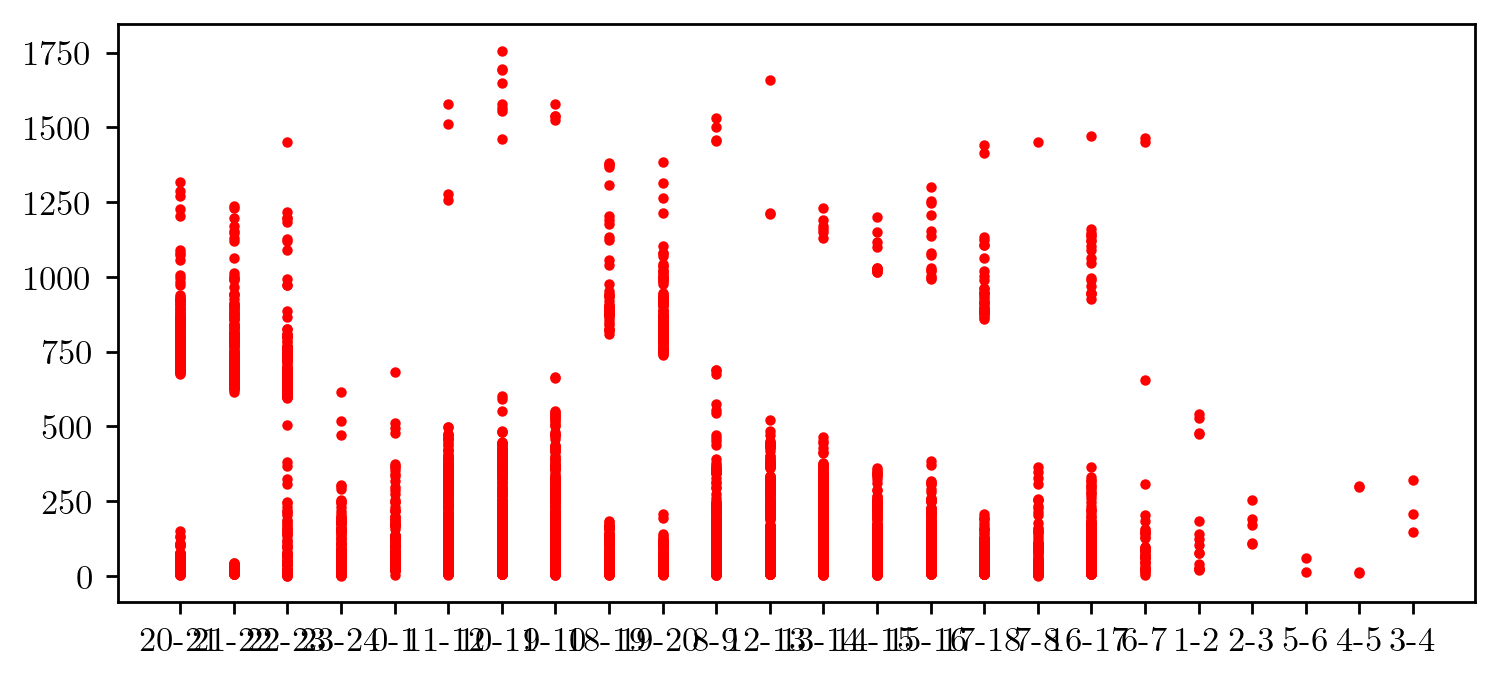

In [297]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

#ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
#ax1.set_ylabel("N° de Camiones", fontsize = 15)
#ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.plot(df_clean["Rango Horario en Espera"], df_clean["Tiempo Espera Limpio"], "ro", markersize = 2)
plt.show()

In [299]:
T_limpio_mean = []
for i in rangos:
    a = df_clean["Tiempo Espera Limpio"][df_clean["Rango Horario en Espera"] == i].mean()
    T_limpio_mean.append(a)

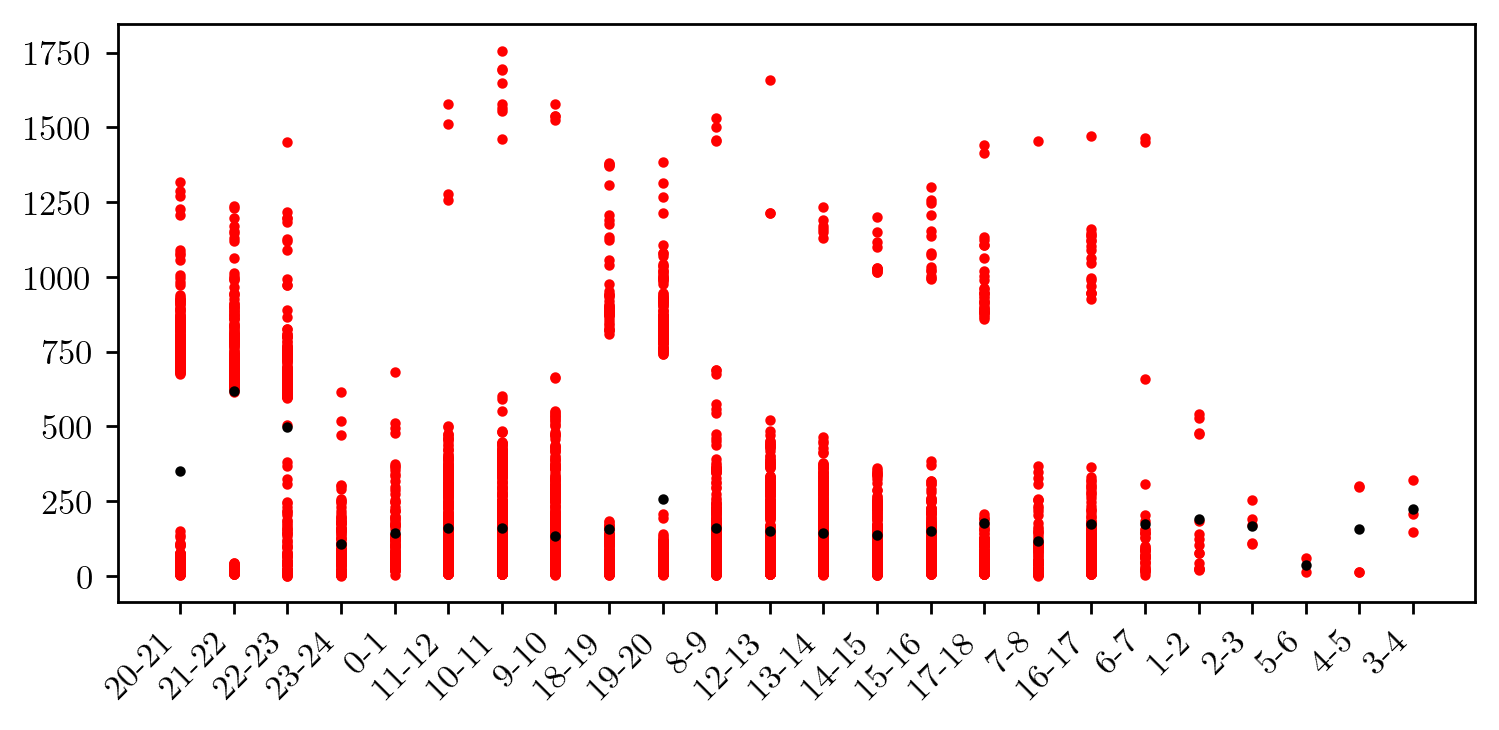

In [303]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

#ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
#ax1.set_ylabel("N° de Camiones", fontsize = 15)
#ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.plot(df_clean["Rango Horario en Espera"], df_clean["Tiempo Espera Limpio"], "ro", markersize = 2)
ax1.plot(rangos, T_limpio_mean, "ko", markersize = 2)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
plt.show()

In [304]:
df_espera.shape

(5679, 13)

In [305]:
df_ss.shape

(5684, 11)

In [306]:
df_espera[df_espera["Tiempo Espera Limpio"]<0].head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio
49,NPC-R SOLAR,2020-01-18 14:23:25,25.316667,2020-01-18 14:48:44,117.033333,Almuerzo,Enero,2020,14-15,2020-01-18,False,66.583333,-41.266667
166,NPC-R SOLAR,2020-01-23 14:40:02,14.850000,2020-01-23 14:54:53,219.116667,Almuerzo,Enero,2020,14-15,2020-01-23,False,49.966667,-35.116667
309,NPC-R SOLAR,2020-01-29 23:36:47,525.916667,2020-01-30 08:22:42,80.416667,Pre,Enero,2020,8-9,2020-01-30,False,533.216667,-7.300000


In [314]:
(df_espera["Hora Ingreso a Puerto"][df_espera["Tiempo Espera Limpio"]<0].iloc[1] - df_espera["Hora Legada a Espera"][df_espera["Tiempo Espera Limpio"]<0].iloc[1]).total_seconds()/60

14.85

In [315]:
df_espera.head()

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.350000
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,891.466667
2,NPC-R SOLAR,2020-01-15 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B,Enero,2020,11-12,2020-01-16,False,0.0,884.416667
3,NPC-R SOLAR,2020-01-15 21:43:32,834.300000,2020-01-16 11:37:50,130.766667,T1B,Enero,2020,11-12,2020-01-16,False,0.0,834.300000
4,NPC-R SOLAR,2020-01-15 20:27:45,103.216667,2020-01-15 22:10:58,31.000000,T2D,Enero,2020,22-23,2020-01-15,False,0.0,103.216667


In [316]:
def Correccion(te, tp):
    dt = (tp-te).total_seconds()/60.
    return dt

In [318]:
df_espera["Tiempo Espera Limpio Real"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio"] if x["Tiempo Espera Limpio"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)

<ipython-input-318-6e4a205c6817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio Real"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio"] if x["Tiempo Espera Limpio"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)


In [320]:
df_espera[df_espera["Tiempo Espera Limpio Real"]<0]

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio Real
